## Business Problem Statement:
Assume you are working with MyBank. The Bank executed a campaign to cross-sell Personal Loans. As part of their Pilot Campaign, 20000 customers were sent campaigns through email, sms, and direct mail. They were given an offer of Personal Loan at an attractive interest rate of 12% and processing fee waived off if they respond within 1 Month.
2512 customer expressed their interest and are marked as column name “TARGET” = 1.
Many Demographics and Behavioral variables are provided.
You have to build a Model to find profitable segments to target for cross-selling personal loans.
Make necessary assumptions and perform necessary data cleaning or pre-processing where required.


### Problem explanation:
- The data looks like a survey as 20000 customers were sent campaign information through emails, sms and direct mails.
- Personal Loan - Interest rate- 12% and free processing fee within 1 month.
- 2512 customers were interested: Target = 1


### Problem:

- Find profitable segments as target for cross-sell personal loans
    * Find people who are more likely to respond with a positive 
        * Check and analyse Target = 1
        * Count = 2512
    * Find people who will respond negatively
        * Check and analyse Target = 0
        * Count = 17488
        
        
### Assumptions:
This looks like a survey dataset. So we will be making assumptions considering it is a survey data.
1. The data collected is a Simple Random Sample. 
2. The data is i.i.d: Independently and identically distributed.
3. Data is Normally distributed or we can use the Central Limit Theorem and assume normality.

## Importing the Libraries

In [1]:
# importing the necessary packages

# for numeric calculations
import numpy as np

# for data manipulation
import pandas as pd
from pylab import *

# for scientific stastistics
import scipy
from scipy import stats

# for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# for machine learning
from sklearn.model_selection import train_test_split 

# to get p values 
from scipy.stats import shapiro 

# for feature scaling
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder

# for feature Selection
from sklearn.feature_selection import SelectKBest,f_classif,GenericUnivariateSelect,mutual_info_classif
from sklearn.feature_selection import mutual_info_classif
from sklearn.decomposition import PCA

# for clustering
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN

# for classification
from sklearn.linear_model import LogisticRegression 
from sklearn.neighbors import KNeighborsClassifier      
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# for ensemble tecniques
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier

# for scikit metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import silhouette_samples ,silhouette_score

# Remove Warnings
import warnings
warnings.filterwarnings(action='ignore')

## Importing the dataset

In [2]:
main_df = pd.read_csv('..\dataset\MyBank_DATA.csv')
df = pd.read_csv('..\dataset\MyBank_DATA.csv')

In [3]:
df.head().T

,0,1,2,3,4
CUST_ID,C7927,C6877,C19922,C8183,C12123
TARGET,0,0,0,0,0
AGE,27,47,40,53,36
GENDER,M,M,M,M,M
BALANCE,3383.75,287489,18216.9,71720.5,1.67162e+06
OCCUPATION,SELF-EMP,SAL,SELF-EMP,SAL,PROF
AGE_BKT,26-30,46-50,36-40,>50,36-40
SCR,776,324,603,196,167
HOLDING_PERIOD,30,28,2,13,24
ACC_TYPE,SA,SA,SA,CA,SA


# Descriptive Statistics

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 40 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CUST_ID                   20000 non-null  object 
 1   TARGET                    20000 non-null  int64  
 2   AGE                       20000 non-null  int64  
 3   GENDER                    20000 non-null  object 
 4   BALANCE                   20000 non-null  float64
 5   OCCUPATION                20000 non-null  object 
 6   AGE_BKT                   20000 non-null  object 
 7   SCR                       20000 non-null  int64  
 8   HOLDING_PERIOD            20000 non-null  int64  
 9   ACC_TYPE                  20000 non-null  object 
 10  ACC_OP_DATE               20000 non-null  object 
 11  LEN_OF_RLTN_IN_MNTH       20000 non-null  int64  
 12  NO_OF_L_CR_TXNS           20000 non-null  int64  
 13  NO_OF_L_DR_TXNS           20000 non-null  int64  
 14  TOT_NO

There do not seem to be any null values here. If special characters were used, we will not have so many int64 and float 64 datatypes.

We will check for them again anyway.

In [5]:
df.isna().sum()

CUST_ID                     0
TARGET                      0
AGE                         0
GENDER                      0
BALANCE                     0
OCCUPATION                  0
AGE_BKT                     0
SCR                         0
HOLDING_PERIOD              0
ACC_TYPE                    0
ACC_OP_DATE                 0
LEN_OF_RLTN_IN_MNTH         0
NO_OF_L_CR_TXNS             0
NO_OF_L_DR_TXNS             0
TOT_NO_OF_L_TXNS            0
NO_OF_BR_CSH_WDL_DR_TXNS    0
NO_OF_ATM_DR_TXNS           0
NO_OF_NET_DR_TXNS           0
NO_OF_MOB_DR_TXNS           0
NO_OF_CHQ_DR_TXNS           0
FLG_HAS_CC                  0
AMT_ATM_DR                  0
AMT_BR_CSH_WDL_DR           0
AMT_CHQ_DR                  0
AMT_NET_DR                  0
AMT_MOB_DR                  0
AMT_L_DR                    0
FLG_HAS_ANY_CHGS            0
AMT_OTH_BK_ATM_USG_CHGS     0
AMT_MIN_BAL_NMC_CHGS        0
NO_OF_IW_CHQ_BNC_TXNS       0
NO_OF_OW_CHQ_BNC_TXNS       0
AVG_AMT_PER_ATM_TXN         0
AVG_AMT_PE

There are No null values mentioned here as well. Now we will check for special characters as sometimes, special characters are used in place of NaN values.

To do this, we need to check all the object type columns and then parse the isalnum() method through them. If it is false in any of them, we will proceed to search for special characters.

### Getting different column types: Categorical, Numeric and All
This will help us analyze the columns more efficiently.

In [6]:
all_cols = list(df.columns)

numeric_cols = list(df.select_dtypes(include=['int64', 'float64']).columns)

categorical_cols = list(df.select_dtypes(include = ['object']).columns)


print('all_cols:\n{}\n'.format(all_cols))
print('numeric_cols:\n{}\n'.format(numeric_cols))
print('categorical_cols:\n{}\n'.format(categorical_cols))

all_cols:
['CUST_ID', 'TARGET', 'AGE', 'GENDER', 'BALANCE', 'OCCUPATION', 'AGE_BKT', 'SCR', 'HOLDING_PERIOD', 'ACC_TYPE', 'ACC_OP_DATE', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'AMT_ATM_DR', 'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR', 'AMT_MOB_DR', 'AMT_L_DR', 'FLG_HAS_ANY_CHGS', 'AMT_OTH_BK_ATM_USG_CHGS', 'AMT_MIN_BAL_NMC_CHGS', 'NO_OF_IW_CHQ_BNC_TXNS', 'NO_OF_OW_CHQ_BNC_TXNS', 'AVG_AMT_PER_ATM_TXN', 'AVG_AMT_PER_CSH_WDL_TXN', 'AVG_AMT_PER_CHQ_TXN', 'AVG_AMT_PER_NET_TXN', 'AVG_AMT_PER_MOB_TXN', 'FLG_HAS_NOMINEE', 'FLG_HAS_OLD_LOAN', 'random']

numeric_cols:
['TARGET', 'AGE', 'BALANCE', 'SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 'NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS', 'NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'FLG_HAS_CC', 'A

There are too many numeric columns. But it looks like they a lot of these are actually categories. We will check that out.

In [7]:
num_cols=['AGE', 'BALANCE','SCR', 'HOLDING_PERIOD', 'LEN_OF_RLTN_IN_MNTH', 'NO_OF_L_CR_TXNS', 'NO_OF_L_DR_TXNS', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS','NO_OF_ATM_DR_TXNS', 'NO_OF_NET_DR_TXNS','NO_OF_MOB_DR_TXNS', 'NO_OF_CHQ_DR_TXNS','FLG_HAS_CC', 'AMT_ATM_DR','AMT_BR_CSH_WDL_DR','AMT_CHQ_DR','AMT_NET_DR','AMT_MOB_DR','AMT_L_DR','NO_OF_IW_CHQ_BNC_TXNS','NO_OF_OW_CHQ_BNC_TXNS','AVG_AMT_PER_ATM_TXN','AVG_AMT_PER_CSH_WDL_TXN','AVG_AMT_PER_CHQ_TXN','AVG_AMT_PER_NET_TXN','AVG_AMT_PER_MOB_TXN']
cat_cols = ['GENDER', 'OCCUPATION', 'ACC_TYPE','AGE_BKT','FLG_HAS_CC','FLG_HAS_ANY_CHGS','FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN']

### Checking for special symbols in column values

In [8]:
for i,col in enumerate(categorical_cols):
    val = df[col].str.isalnum()
    if val[i] == False:
        print('{} {}'.format(col, val[i]))
        continue

OCCUPATION False
AGE_BKT False
ACC_OP_DATE False


In [9]:
df['OCCUPATION'].value_counts()

SAL         5855
PROF        5417
SENP        5160
SELF-EMP    3568
Name: OCCUPATION, dtype: int64

No special symbols that signify inconsistency.

In [10]:
df['AGE_BKT'].value_counts()

26-30    3434
31-35    3404
41-45    3067
>50      3035
36-40    2814
46-50    2493
<25      1753
Name: AGE_BKT, dtype: int64

In [11]:
df['ACC_OP_DATE'].value_counts()

11/16/2010    24
04-03-2009    23
7/25/2010     22
05-06-2013    21
8/24/2010     20
              ..
12-04-2004     1
12/24/2013     1
2/14/2009      1
2/23/1999      1
07-02-2003     1
Name: ACC_OP_DATE, Length: 4869, dtype: int64

We see that there are no special characters symbolizing null values anywhere. But we do see that there are inconsistencies in the 'ACC_OP_DATE' column. We will fix that now.

### Dealing with the Inconsistency in the ACC_OP_DATE column

In [12]:
df['ACC_OP_DATE']

0         3/23/2005
1        10-11-2008
2         4/26/2012
3        07-04-2008
4        12/29/2001
            ...    
19995    09-04-2003
19996    05-03-2013
19997    11-01-2007
19998     8/22/2006
19999     6/21/2014
Name: ACC_OP_DATE, Length: 20000, dtype: object

We see that the date column has both / and - as separators. We will deal with that now.

In [13]:
# removing inconsistency from the date column
# date format Changing to DD/MM/YYYY
df['ACC_OP_DATE'] = pd.to_datetime(df['ACC_OP_DATE']).dt.strftime('%d/%m/%y')

### Dealing with AGE_BKT 
AGE_BKT was unintuitive as it had values like <25 and >55. We will modify this column to make analysis easier.

In [14]:
df['AGE_BKT'] = pd.cut(df['AGE'], [20,25,30,35,40,45,50,55])

In [15]:
df['AGE_BKT'].value_counts().sum()

20000

#### Plotting the 5 point summary of the numeric columns:-

In [16]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TARGET,20000.0,0.125600,0.331406,0.000000,0.000000,0.000000,0.000000e+00,1.000000e+00
AGE,20000.0,38.418150,9.577985,21.000000,30.000000,38.000000,4.600000e+01,5.500000e+01
BALANCE,20000.0,511362.192118,723592.961792,0.000000,64754.025000,231675.845000,6.538768e+05,8.360431e+06
SCR,20000.0,440.150300,249.887582,100.000000,227.000000,364.000000,6.440000e+02,9.990000e+02
HOLDING_PERIOD,20000.0,14.955650,8.642634,1.000000,7.000000,15.000000,2.200000e+01,3.100000e+01
LEN_OF_RLTN_IN_MNTH,20000.0,125.239300,54.953936,29.000000,79.000000,125.000000,1.720000e+02,2.210000e+02
NO_OF_L_CR_TXNS,20000.0,12.348050,12.151921,0.000000,6.000000,10.000000,1.400000e+01,7.500000e+01
NO_OF_L_DR_TXNS,20000.0,6.633700,7.675830,0.000000,2.000000,5.000000,7.000000e+00,7.400000e+01
TOT_NO_OF_L_TXNS,20000.0,18.975400,17.759290,0.000000,9.000000,14.000000,2.100000e+01,1.490000e+02
NO_OF_BR_CSH_WDL_DR_TXNS,20000.0,1.883000,2.263596,0.000000,1.000000,1.000000,2.000000e+00,1.500000e+01


The 5 point summary shows us that a lot of our numeric columns have large standard deviations and a large difference between the percentiles. This means our data is Skewed and has large outliers. We will have to deal with them.

(i) The 'BALANCE' column has a huge difference between the mean and 50% value, so there seems to be outliers existing in that column

(ii) The 'HOLDING_PERIOD' column has a mean of 15, which means that customers who have a holding period of less than or equal to 15 days can be considered as those who might be interested in personal loans
 
(iii) Customers with larger number of transactions can also be considered to be in the market for loans

 (iv) The 'AMT_OTH_BK_ATM_USG_CHGS' and 'AMT_MIN_BAL_NMC_CHGS' columns indicate the amount lost by the customer through fines due to their defaults in Bank's policies

(v) The 'NO_OF_IW_CHQ_BNC_TXNS' and 'NO_OF_OW_CHQ_BNC_TXNS' columns indicate whether the customer has defaulted in the Bank's Cheque policies

We see that the min and max values of a lot of these columns like Balance are really really large. These are extreme outliers. We will have to scale them to accomodate these values and not lose information.

### Feature Engineering - Combining Columns

In [17]:
df['AMT_FINED'] = df['AMT_OTH_BK_ATM_USG_CHGS'] + df[ 'AMT_MIN_BAL_NMC_CHGS'] # Adding the charges into one column.

df['CHQ_FINED'] = df['NO_OF_IW_CHQ_BNC_TXNS'] + df['NO_OF_OW_CHQ_BNC_TXNS'] # Adding the fine charged to a single column

In [18]:
df['TOT_NUM_OF_DR_TXNS'] = (df['NO_OF_BR_CSH_WDL_DR_TXNS'] # Number of cash withdrawals  
                             + df['NO_OF_ATM_DR_TXNS'] # Number of ATM debit withdrawyals 
                             + df['NO_OF_NET_DR_TXNS'] # Number of net debit transactions 
                             + df['NO_OF_MOB_DR_TXNS'] # Number of mobile banking debit transactions
                             + df['NO_OF_CHQ_DR_TXNS'])  # Number of Cheque debit transactions   

In [19]:
df['CHQ_FINED'].value_counts() # Counting the values of the cheque fine amounts

0    18304
1     1649
2       47
Name: CHQ_FINED, dtype: int64

In [20]:
df['AMT_FINED'].value_counts() # Values of Amount fined in total

0      19710
170      149
200       44
140       35
70        25
250       23
40        11
310        2
240        1
Name: AMT_FINED, dtype: int64

## Columns' Relationship with TARGET

Before we start analyzing the data, we need to see if the columns are related to the Target column at all. If they are not, there is no point in analyzing them.

### Hypothesis
H0 - Target Variable is correlated to columns <br>
Ha: Target Variable is not related to columns

In [21]:
df[df.columns[0:]].corr()['TARGET']

TARGET                      1.000000
AGE                         0.022977
BALANCE                    -0.067062
SCR                         0.078909
HOLDING_PERIOD             -0.135447
LEN_OF_RLTN_IN_MNTH        -0.023618
NO_OF_L_CR_TXNS             0.120284
NO_OF_L_DR_TXNS             0.122954
TOT_NO_OF_L_TXNS            0.134504
NO_OF_BR_CSH_WDL_DR_TXNS    0.101909
NO_OF_ATM_DR_TXNS           0.082359
NO_OF_NET_DR_TXNS           0.097071
NO_OF_MOB_DR_TXNS           0.054477
NO_OF_CHQ_DR_TXNS           0.103531
FLG_HAS_CC                  0.100513
AMT_ATM_DR                  0.083251
AMT_BR_CSH_WDL_DR           0.048360
AMT_CHQ_DR                  0.060796
AMT_NET_DR                  0.062121
AMT_MOB_DR                  0.083215
AMT_L_DR                    0.095351
FLG_HAS_ANY_CHGS            0.045783
AMT_OTH_BK_ATM_USG_CHGS     0.028417
AMT_MIN_BAL_NMC_CHGS        0.005053
NO_OF_IW_CHQ_BNC_TXNS       0.011601
NO_OF_OW_CHQ_BNC_TXNS       0.027411
AVG_AMT_PER_ATM_TXN         0.074995
A

Null Hypothesis is rejected. Alternate Hypothesis is accepted.

We see that none of the columns are highly correlated to the target column. This is unfortunate. Now we will see the correlation of all columns with each other.

Such low correlation values imply that these columns as stand alone units do not contribute to the Target, but as groups, they may be related to the target. At least indirectly

### Hypothesis

In [22]:
df.corr()  # Gives a dataframe of all the correlation of all numeric values

,TARGET,AGE,BALANCE,SCR,HOLDING_PERIOD,LEN_OF_RLTN_IN_MNTH,NO_OF_L_CR_TXNS,NO_OF_L_DR_TXNS,TOT_NO_OF_L_TXNS,NO_OF_BR_CSH_WDL_DR_TXNS,...,AVG_AMT_PER_CSH_WDL_TXN,AVG_AMT_PER_CHQ_TXN,AVG_AMT_PER_NET_TXN,AVG_AMT_PER_MOB_TXN,FLG_HAS_NOMINEE,FLG_HAS_OLD_LOAN,random,AMT_FINED,CHQ_FINED,TOT_NUM_OF_DR_TXNS
TARGET,1.000000,0.022977,-0.067062,0.078909,-0.135447,-0.023618,0.120284,0.122954,0.134504,0.101909,...,-0.002157,0.065239,0.025707,0.076258,0.011784,-0.011555,-0.001504,0.023266,0.027590,0.122954
AGE,0.022977,1.000000,-0.122587,-0.005871,-0.012060,-0.008279,0.030170,0.019602,0.028932,0.024266,...,-0.005078,0.014456,0.000079,0.028288,0.016856,0.010269,-0.004517,0.006280,-0.014223,0.019602
BALANCE,-0.067062,-0.122587,1.000000,-0.065300,0.039241,-0.000855,-0.047652,-0.043431,-0.051299,-0.034814,...,0.005807,-0.023732,-0.019149,-0.028727,-0.004205,-0.028707,-0.004026,-0.051930,-0.017154,-0.043431
SCR,0.078909,-0.005871,-0.065300,1.000000,-0.025174,0.009034,-0.013179,0.009389,-0.004952,0.004827,...,-0.022531,0.008267,0.025731,-0.015246,-0.001952,0.013333,0.008131,0.011692,0.005251,0.009389
HOLDING_PERIOD,-0.135447,-0.012060,0.039241,-0.025174,1.000000,0.011448,-0.008474,-0.347855,-0.156350,-0.196455,...,0.053490,-0.209996,-0.107639,-0.080625,-0.005034,-0.002751,-0.002089,-0.058255,-0.075773,-0.347855
LEN_OF_RLTN_IN_MNTH,-0.023618,-0.008279,-0.000855,0.009034,0.011448,1.000000,0.021719,0.001878,0.015777,-0.003073,...,0.007646,0.012910,-0.002317,0.000768,0.010750,-0.000576,0.003609,-0.010358,0.002116,0.001878
NO_OF_L_CR_TXNS,0.120284,0.030170,-0.047652,-0.013179,-0.008474,0.021719,1.000000,0.582878,0.936226,0.376076,...,-0.072481,0.296119,-0.070980,0.331736,0.003048,-0.001724,-0.006647,0.240361,0.027817,0.582878
NO_OF_L_DR_TXNS,0.122954,0.019602,-0.043431,0.009389,-0.347855,0.001878,0.582878,1.000000,0.831203,0.566711,...,-0.138214,0.496141,-0.040287,0.409491,0.000826,-0.003605,-0.005101,0.397274,0.102323,1.000000
TOT_NO_OF_L_TXNS,0.134504,0.028932,-0.051299,-0.004952,-0.156350,0.015777,0.936226,0.831203,1.000000,0.502433,...,-0.109383,0.417131,-0.065890,0.404073,0.002475,-0.002790,-0.006643,0.336172,0.063328,0.831203
NO_OF_BR_CSH_WDL_DR_TXNS,0.101909,0.024266,-0.034814,0.004827,-0.196455,-0.003073,0.376076,0.566711,0.502433,1.000000,...,-0.127145,0.137317,-0.045247,0.432037,0.008636,0.005678,0.001384,-0.002184,0.067115,0.566711


The given correlation dataframe is too large and so it is difficult to see which columns are actually correlated. We will just find out which of these columns have a high value and then check it.

In [23]:
def high_corr(dataframe, threshold):
    
    '''
        This function takes in a dataframe and an user specified threshold.
        It will then iterate through each column and give a correlation.
        It will finally add all the correlation values greater than or equal to the threshold to another list
        It then returns the list of correlations and columns that have correlation greate than or equal to the threshold.
    '''
    
    corr_matrix = dataframe.corr() # Get a dataframe of correlations
    iters = range(len(corr_matrix.columns) - 1) # Length is one less than size of columns of the dataframe
    
    # If we want to know the correlation values
    for i in iters:
        for j in range(i):
            item = corr_matrix.iloc[j:(j+1), (i+1):(i+2)]
            col = item.columns
            row = item.index
            val = item.values
            
            if abs(val) >= threshold:
                print('{} --- {} : {}'.format(col.values[0], row.values[0], round(val[0][0],2)))

high_corr(df, 0.7)

TOT_NO_OF_L_TXNS --- NO_OF_L_CR_TXNS : 0.94
NO_OF_ATM_DR_TXNS --- NO_OF_L_DR_TXNS : 0.81
NO_OF_NET_DR_TXNS --- NO_OF_L_DR_TXNS : 0.92
NO_OF_NET_DR_TXNS --- TOT_NO_OF_L_TXNS : 0.77
NO_OF_MOB_DR_TXNS --- NO_OF_L_DR_TXNS : 0.76
NO_OF_MOB_DR_TXNS --- NO_OF_ATM_DR_TXNS : 0.77
AMT_ATM_DR --- NO_OF_ATM_DR_TXNS : 0.71
AMT_L_DR --- AMT_CHQ_DR : 0.73
AMT_OTH_BK_ATM_USG_CHGS --- NO_OF_ATM_DR_TXNS : 0.84
AMT_OTH_BK_ATM_USG_CHGS --- NO_OF_MOB_DR_TXNS : 0.81
AVG_AMT_PER_ATM_TXN --- AMT_ATM_DR : 0.72
AVG_AMT_PER_CSH_WDL_TXN --- AMT_BR_CSH_WDL_DR : 0.78
AVG_AMT_PER_CHQ_TXN --- AMT_CHQ_DR : 0.9
AVG_AMT_PER_NET_TXN --- AMT_NET_DR : 0.86
AVG_AMT_PER_MOB_TXN --- AMT_MOB_DR : 0.96
AMT_FINED --- AMT_MIN_BAL_NMC_CHGS : 0.72
CHQ_FINED --- NO_OF_IW_CHQ_BNC_TXNS : 0.7
CHQ_FINED --- NO_OF_OW_CHQ_BNC_TXNS : 0.71
TOT_NUM_OF_DR_TXNS --- NO_OF_L_DR_TXNS : 1.0
TOT_NUM_OF_DR_TXNS --- TOT_NO_OF_L_TXNS : 0.83
TOT_NUM_OF_DR_TXNS --- NO_OF_ATM_DR_TXNS : 0.81
TOT_NUM_OF_DR_TXNS --- NO_OF_NET_DR_TXNS : 0.92
TOT_NUM_OF_DR_TX

We did not do covariance because we do not yet know a good value for a high enough covariance for this data.

## Outlier Removal

Removing outliers beyond the third standard deviation (beyond 99.7% of datapoints)

In [24]:
df.shape

(20000, 43)

In [25]:
outlier_list = ['BALANCE','NO_OF_L_DR_TXNS','TOT_NO_OF_L_TXNS',
              'NO_OF_BR_CSH_WDL_DR_TXNS','NO_OF_MOB_DR_TXNS',
              'NO_OF_CHQ_DR_TXNS','AMT_ATM_DR','AMT_L_DR']

for i in outlier_list: 
    
    a=df[i].quantile(0.997)
    df=df[df[i]<a]

In [26]:
df.shape

(18992, 43)

 As we can see that we lost approximatley  only 5% data when we remove the outliers after 99.7th percentile as it is the third standard deviation. 

 Above columns were chosen because they had large numbers of outliers compared to other columns 

 In order to make sure our outliers removal dosen't effect the model score we should make the data robust .

# Inferential Statistics

## Univariate Analysis

### Numerical Columns

#### AGE

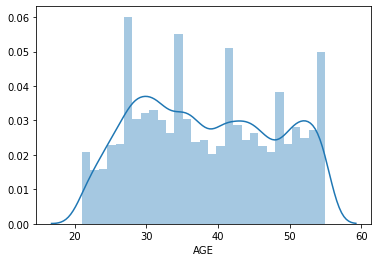

In [27]:
sns.distplot(df['AGE'])

We see that age is not normally distributed. We will need to check mean and variance in order to assume normality in the whole population.

In [28]:
print('Variance: {}\nMean : {}'.format(df['AGE'].var(), df['AGE'].mean()))

Variance: 91.9572404979501
Mean : 38.412910699241785


We see that age has countable mean and variance. So, we will use CLT and consider the population to have an uniform distribution and carry on with our analysis.

Next we will find outliers in our Age column by plotting a boxplot.

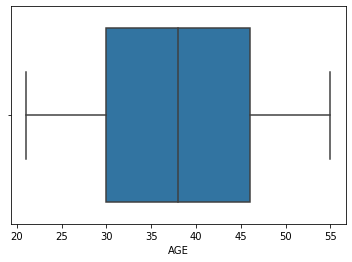

In [29]:
sns.boxplot(df['AGE'])

We see that Age has no outliers, has a min of 21, max of 55 and a median of 38.

#### BALANCE

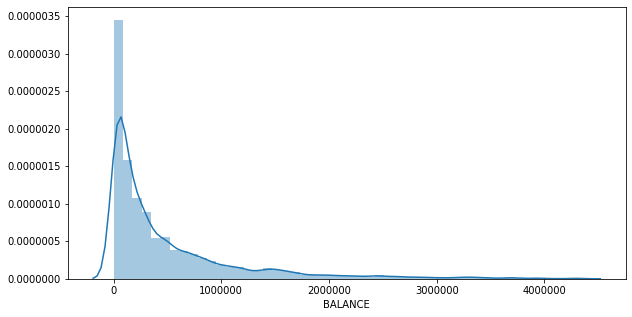

In [30]:
plt.figure(figsize=(10,5))
sns.distplot(df['BALANCE'])

We see that balance is heavily right skewed implying that most people have a balance range of around 0 and low 10,000s.

Using the CLT, we can assume normality of the entire population though.

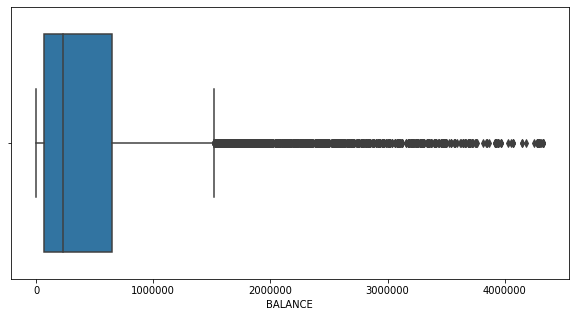

In [31]:
plt.figure(figsize=(10,5))
sns.boxplot(df['BALANCE'])

We see that a lot of people have low balance but there are a huge number of people with really high balance as well. This means that we can probably find a relationship where a small group of people have a alarge balance. That group may be a good group to target for loans if they haven't taken one yet.

#### Looping through the Numeric Columns

In [32]:
col_list = ['HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 'NO_OF_BR_CSH_WDL_DR_TXNS', 
            'NO_OF_ATM_DR_TXNS', 'NO_OF_CHQ_DR_TXNS', 'AMT_ATM_DR', 
            'AMT_BR_CSH_WDL_DR', 'AMT_CHQ_DR', 'AMT_NET_DR',  'AMT_L_DR']

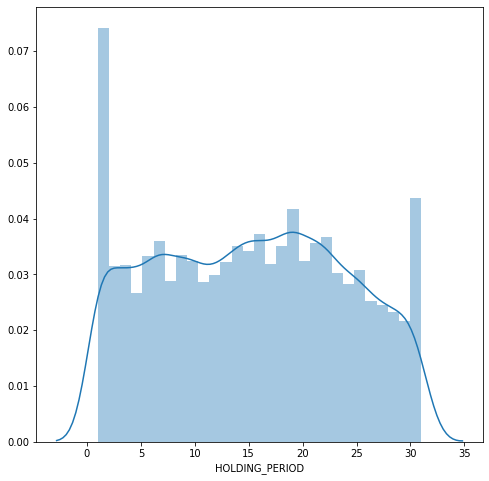

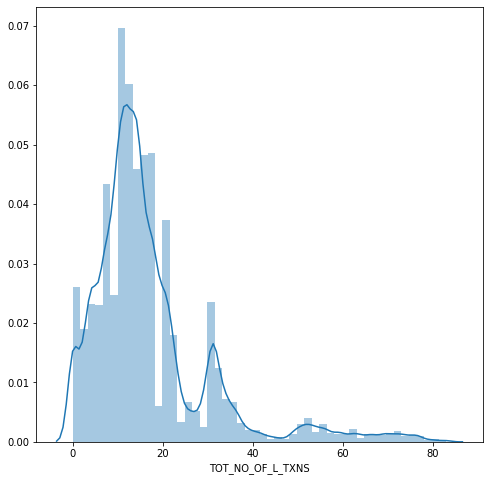

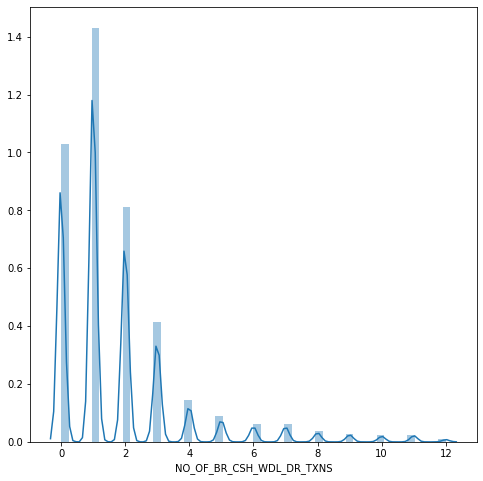

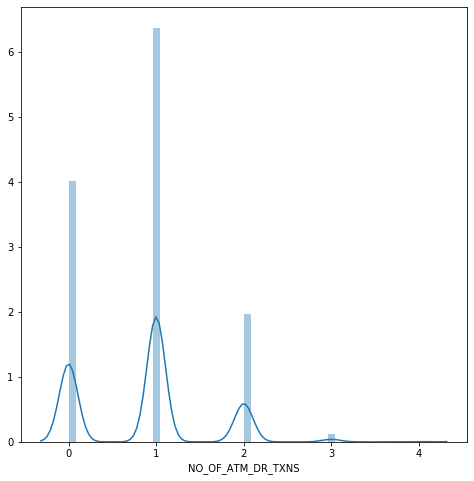

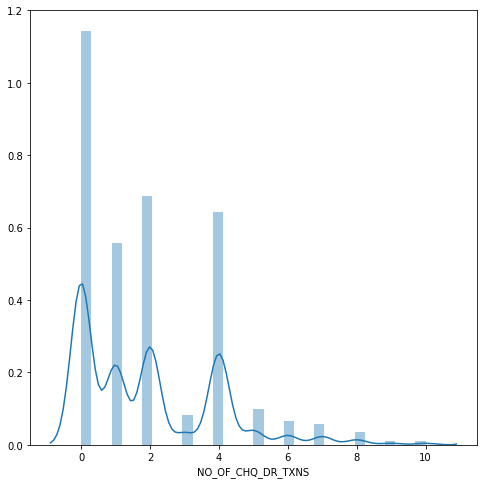

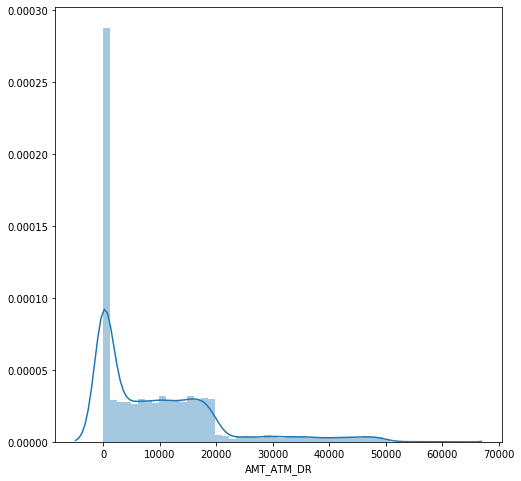

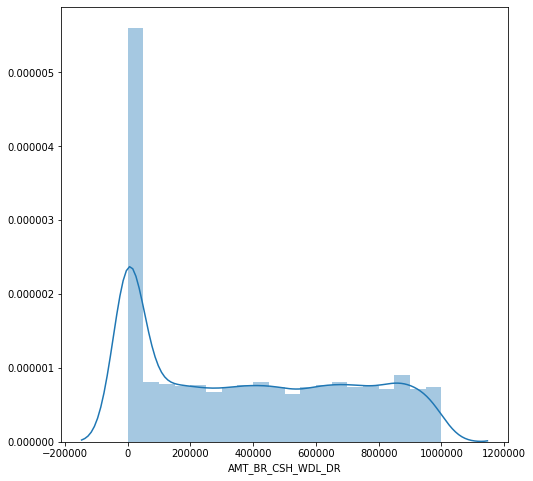

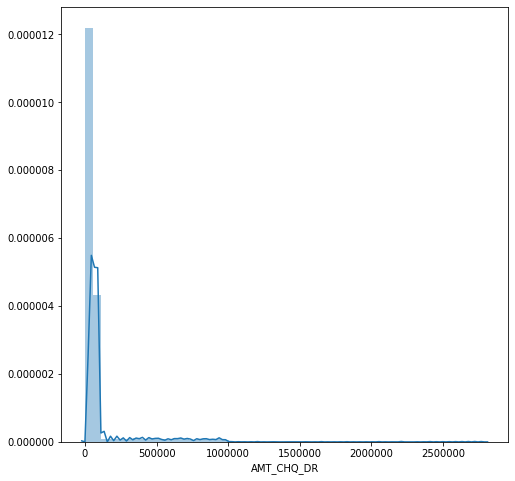

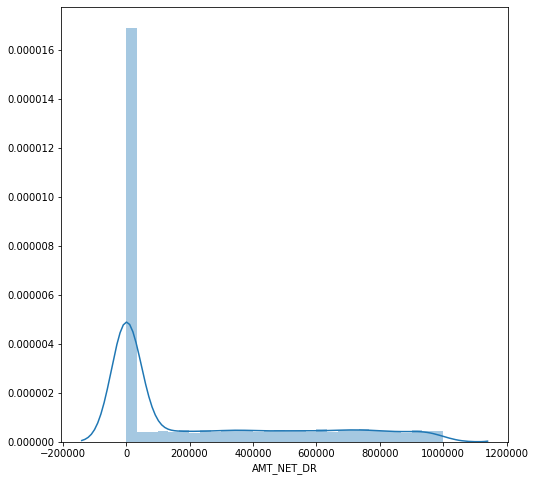

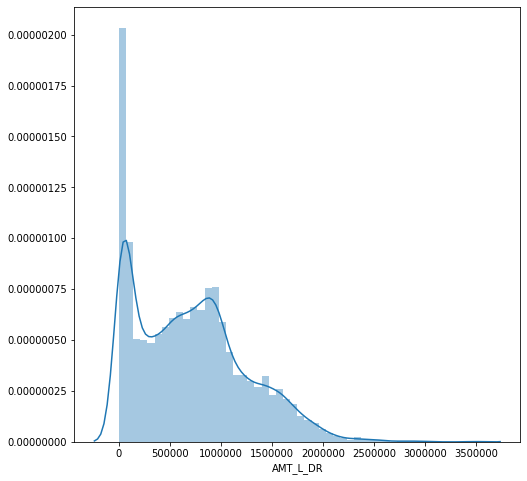

In [33]:
for col in col_list:
    plt.figure(figsize=(8,8))
    sns.distplot(df[col])
    plt.show()

<br>**Count Graphs**
* All the other graphs are highly skewed to the right but again, we can assume normality due to the CLT as all of their variances, though high, are countable.

* We realize that a lot of these columns are actually counts and we can use them as categories or counts when needed. These are not at all continuous values but countable discreets.
    * HOLDING_PERIOD
    * NO_OF_ATM_DR_TXNS
    * NO_OF_BR_CSH_WDL_DR_TXNS
    * TOT_NO_L_TXNS
   
**Other Graphs**
* We see that most other graphs have their medians at 0 while being very heavily right skewed. We will have to see if their are just noisy data or important columns.

#### Plotting the Boxplots for these Columns

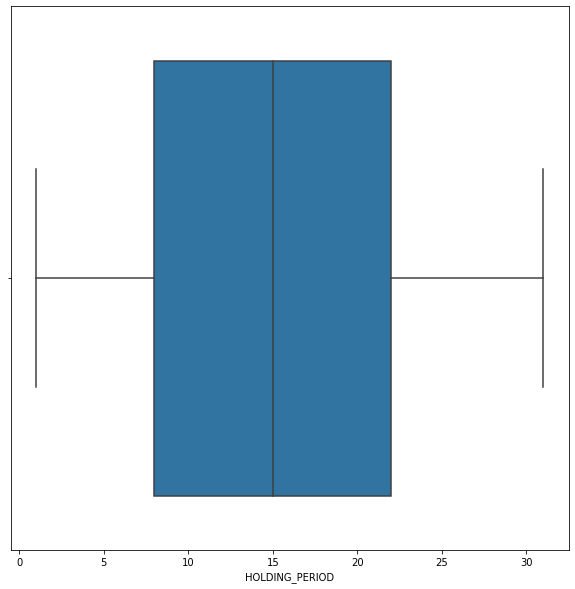

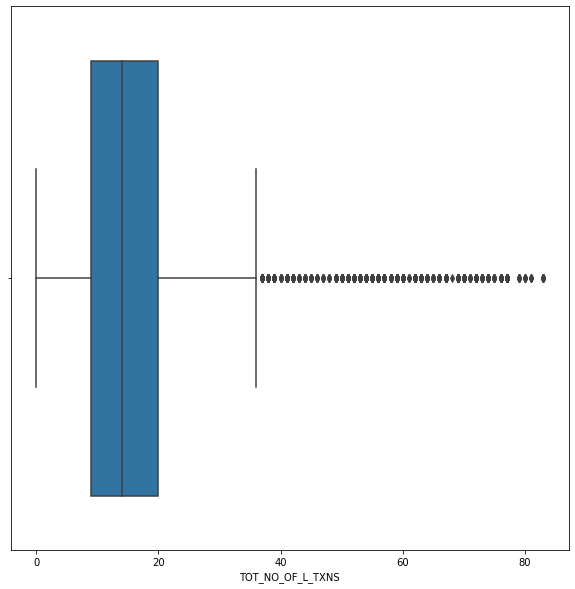

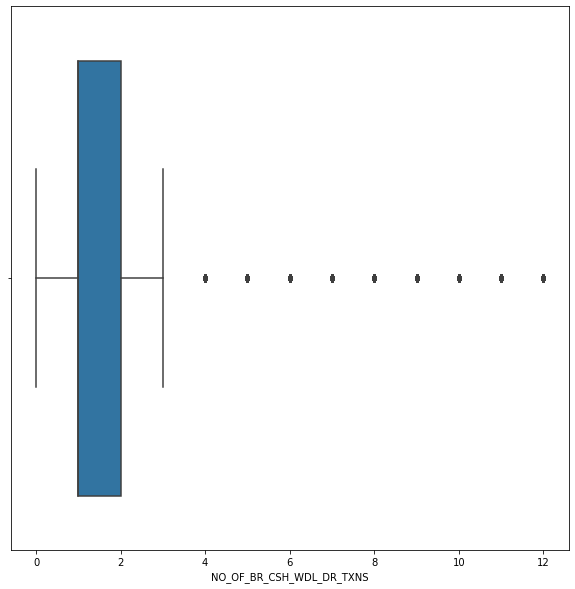

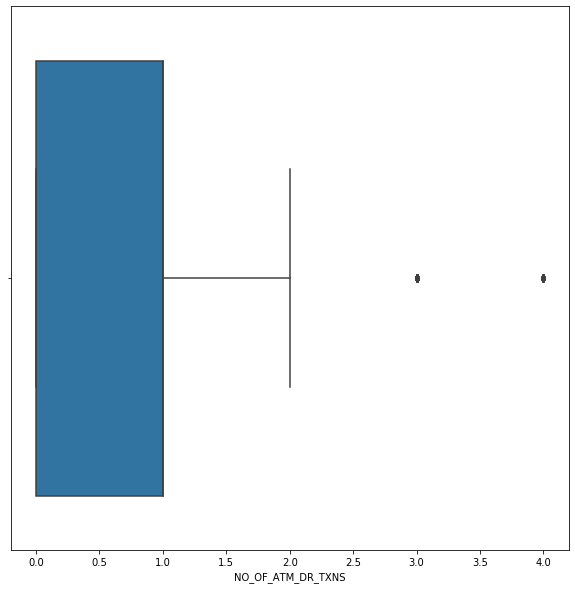

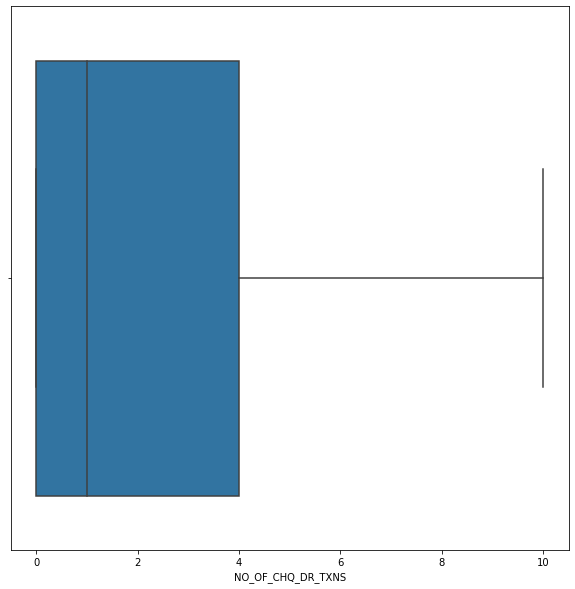

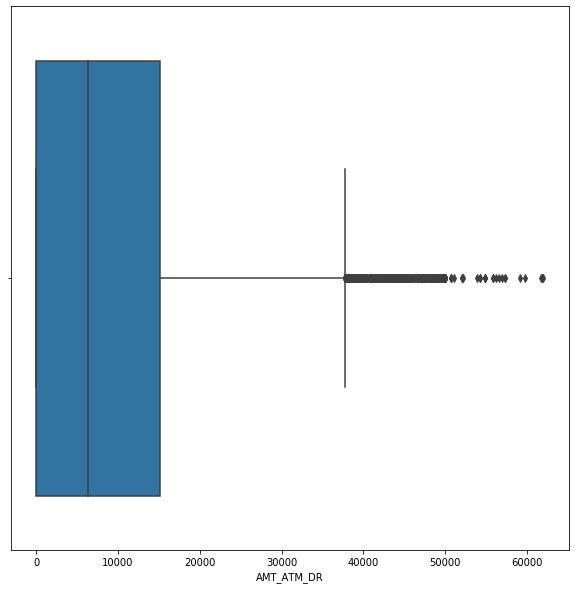

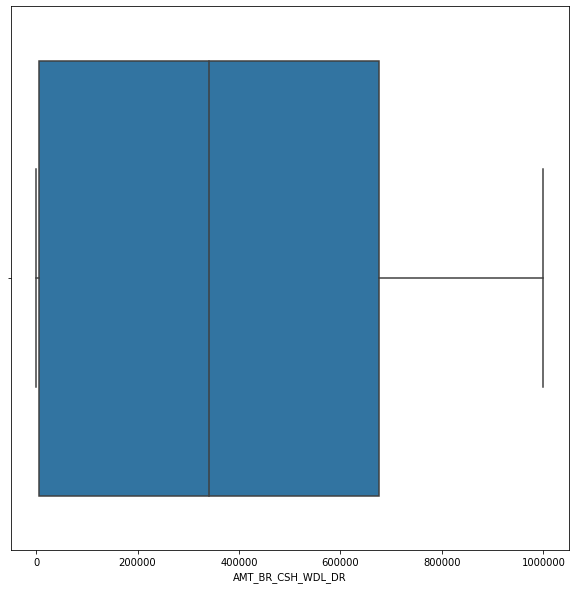

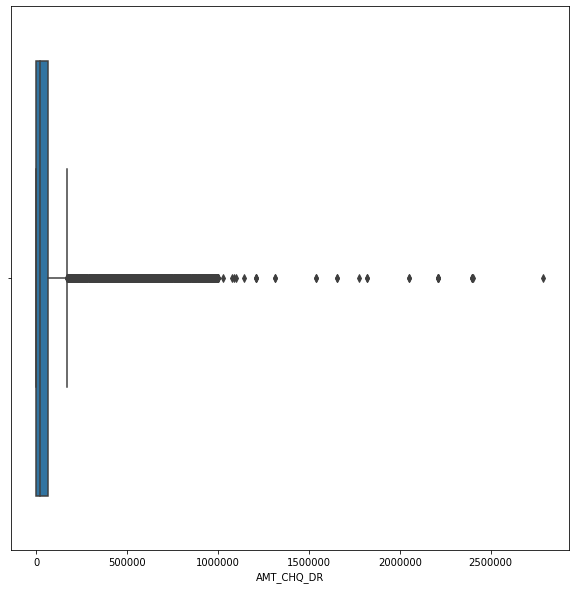

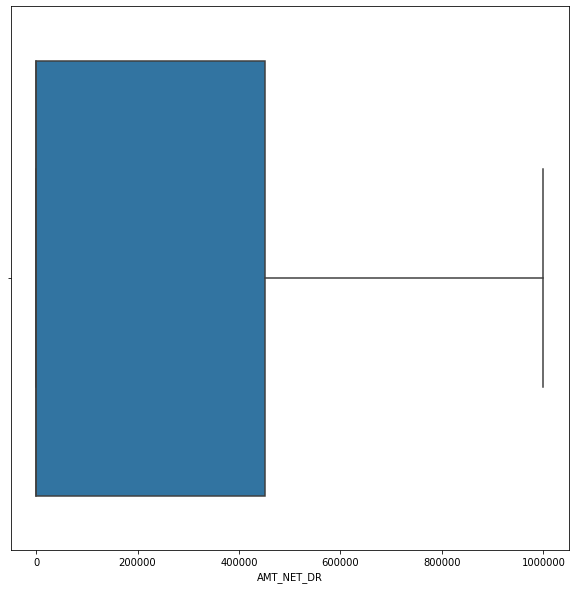

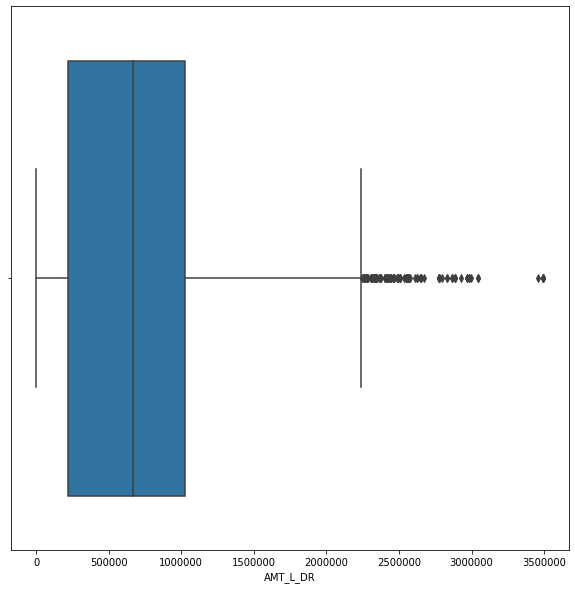

In [34]:
for col in col_list:
    plt.figure(figsize=(10,10))
    sns.boxplot(df[col])
    plt.show()

Most of the outliers are from the counter columns but many, like AMT_ATM_DR and other continuous columns have outliers as well. These are just points where people spend a lot more money.

### Categorical Columns

There are some columns that are unique to customers and so we will skip them for the analysis.
* CUST_ID: Unique to every customer
* ACC_OP_DATE: The date won't affect whether a person is interested in the offer or not. 
* AGE_BKT: It was inconsistent so we fixed it.

In [35]:
categorical_cols.remove('AGE_BKT')
categorical_cols.remove('ACC_OP_DATE')
categorical_cols.remove('CUST_ID')


categorical_cols

['GENDER', 'OCCUPATION', 'ACC_TYPE']

Checking the counts for each of these columns.

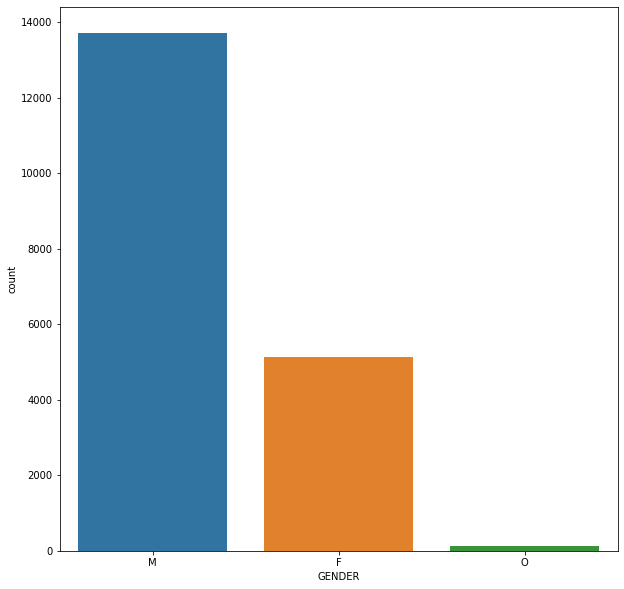

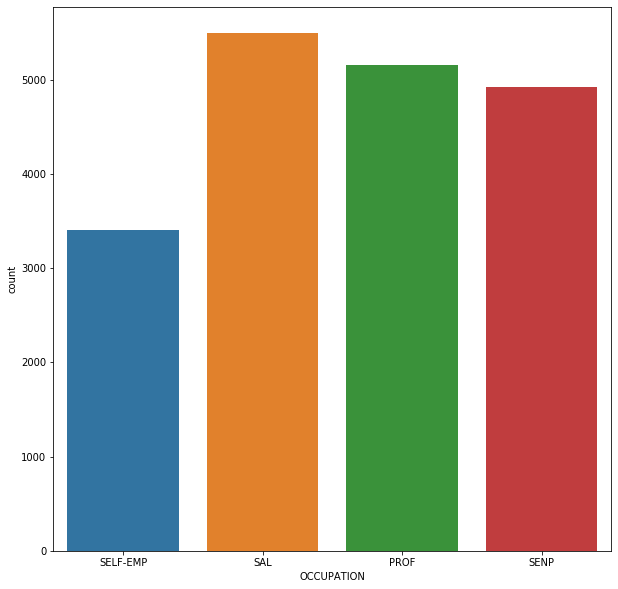

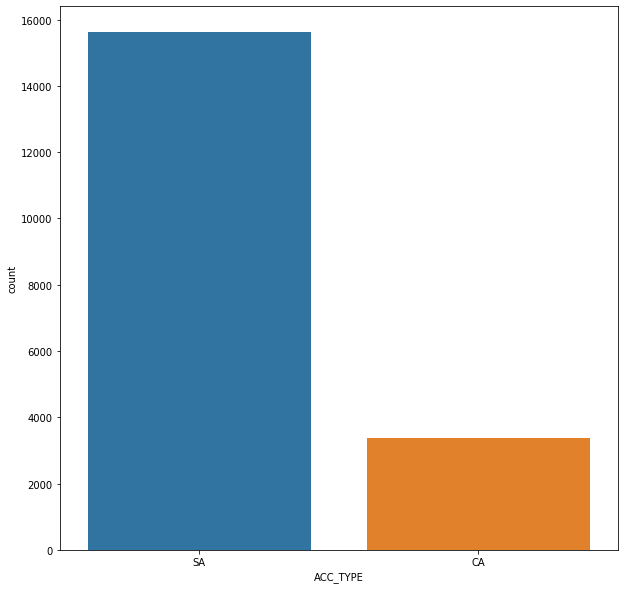

In [36]:
for col in categorical_cols[0:]:
    plt.figure(figsize=(10,10))
    sns.countplot(df[col])
    plt.show()

**GENDER**
* We see that Gender is also a biased data as most members are male.
* We also see that the contribution of the 'Other' category is pretty negligable.


**ACC_TYPE**
* We see that most people are in the working class getting a salare, thus, SAL.

**OCCUPATION**
* We see that Occupation is more evenly distributed.
* Self employed people have the least count but they are not that far away in numbers.

**ACC_OP_DATE**
* That looks like just the date. We might be interested in looking at month and year and target. We will get to that later.

-----------------------------------------------------------------------------------------------------------------------------------

## Multivariate Analysis

### Checking group of columns' relationship with TARGET

#### AGE, AGE_BKT and BALANCE with TARGET

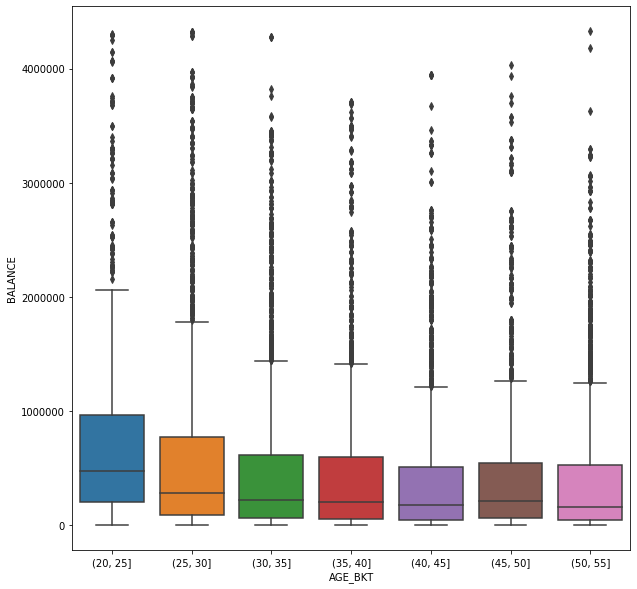

In [37]:
plt.figure(figsize=(10,10))
sns.boxplot(x='AGE_BKT', y = 'BALANCE', data=df)

We see that most people who have really high balance lie on the 30-35 age group.

The least varried is the 35-40 age group.

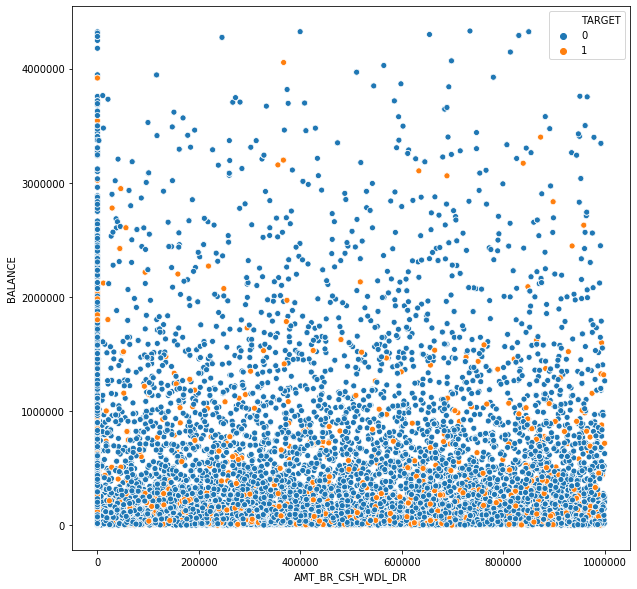

In [38]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='AMT_BR_CSH_WDL_DR', y = 'BALANCE', data=df, hue='TARGET')

We don't see a relationship between amount of cash withdrawal to balance. <br>
The few things we see are:
* Most people with lower balance withdraw cash. This is something we would want to look at later.
* As the balance increases, people reduce withdrawing cash. There are a few exceptions of course.
* Most of the people who take loans lie on the lower balance group but with very high cash withdrawyal rates. Maybe we can use this.
* A considerable amount of people belong to the middle balance group who liked the scheme as well.

Here we see that:
* People with really low balance do not make mobile debit transactions
* A few people with really high mobile transactions and low balance also take loans. This might be a segment we might want to focus on.
* Very few people make a lot of mobile debit transactions. Maybe because of a lack of technology or awareness or there may be a better mode of transaction.

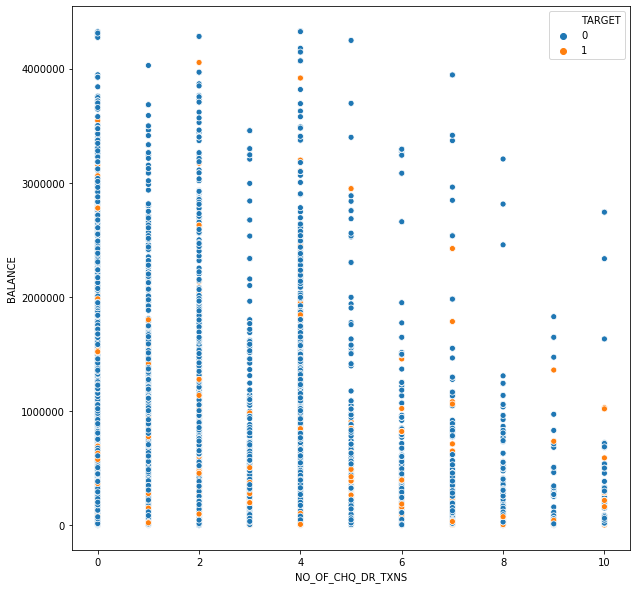

In [39]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='NO_OF_CHQ_DR_TXNS', y = 'BALANCE', data=df, hue='TARGET')

Again we see that the lower income group make less cheque transactions.

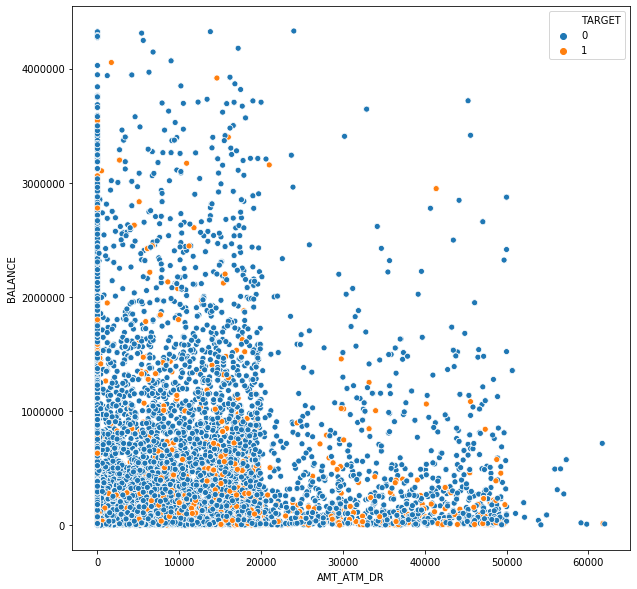

In [40]:
plt.figure(figsize=(10,10))
sns.scatterplot(x='AMT_ATM_DR', y = 'BALANCE', data=df, hue='TARGET')

Here we see that the lower income people perform more ATM transactions, so it's safe for us to assume they may take loans.

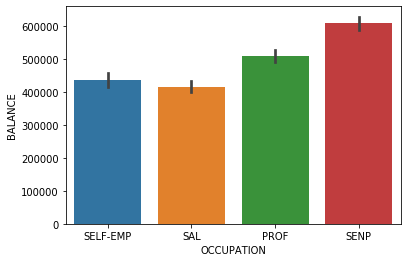

In [41]:
sns.barplot(x = df['OCCUPATION'], y = df['BALANCE'])

This graph tells us the people on pension funds hold the most balance at an average and people with SAL hold the least.

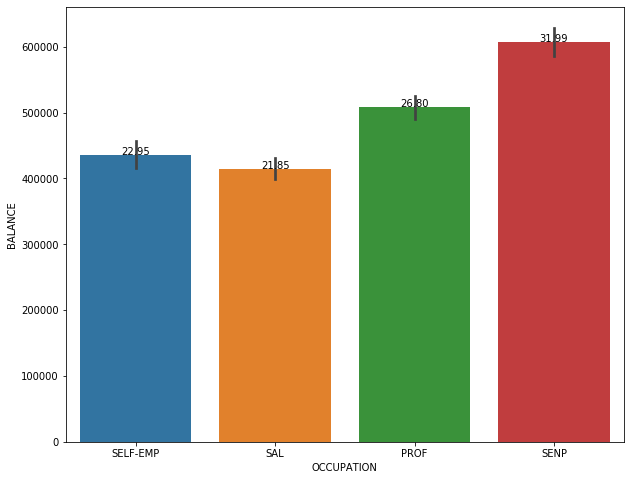

In [42]:
# To print the count along with the % occupied in the sample, we will do this:

total = float(len(df))

plt.figure(figsize=(10,8))

ax = sns.barplot(x = df['OCCUPATION'], y = df['BALANCE'])

for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2,
           height,
           '{:1.2f}'.format(height/total),
           ha = 'center')
plt.show()

We see that the people on pension funds have the highest balance.

The people on Salary have the lowest balance led by Self Employed people.

### Creating a TARGET=1 and TARGET=0 dataframe for better analysis of the people who responded that they're interested in taking the loan.

In [43]:
non_target_df = df.loc[df['TARGET'] == 0] # All rows where target is 0
target_df = df.loc[df['TARGET'] == 1] # All rows where target is 1
print(target_df.shape, non_target_df.shape)

(2314, 43) (16678, 43)


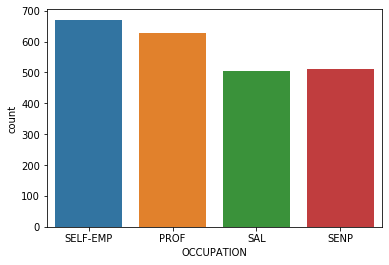

In [44]:
sns.countplot(target_df['OCCUPATION'])

We see that its usually the Self employed and professionals who are interested in taking loans compared to the other two groups. This may be because Self employed people need it for their their businesses probably.

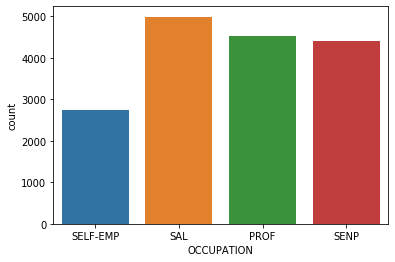

In [45]:
sns.countplot(non_target_df['OCCUPATION'])

People belonging to the SAL column tend to not take loans because they have a consistent source of income. On the other hand Self Employed people are low when it comes to not being interested in the loans.

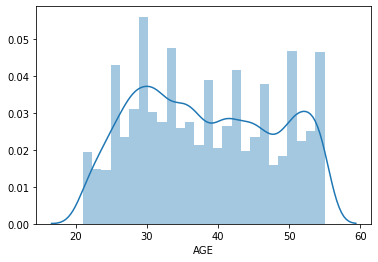

In [46]:
sns.distplot(non_target_df['AGE'])

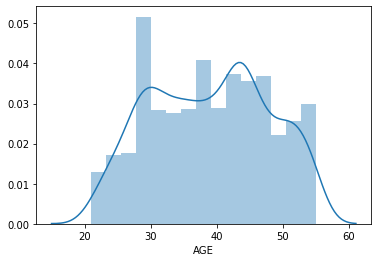

In [47]:
sns.distplot(target_df['AGE'])

We see that middle age people want to take loans, not the younger generation. while it is more evenly distributed for the non target sample.

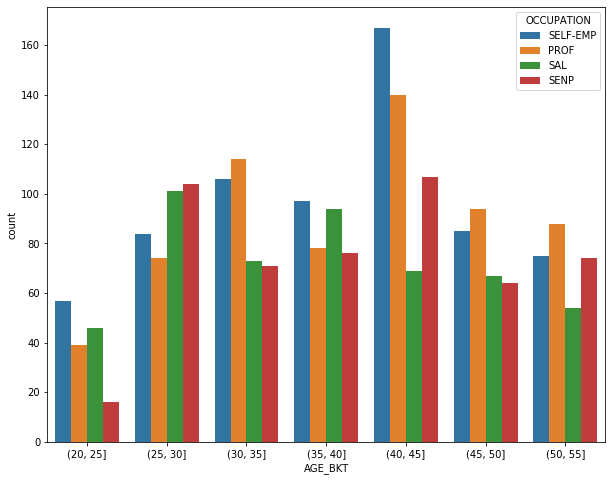

In [48]:
plt.figure(figsize=(10,8))
sns.countplot(target_df['AGE_BKT'], hue = target_df['OCCUPATION'])

We see that:
* Self employeed people at the age groups of 20-25, 40-45, 45-50 are the ones who take the most loans.
* People on salary want to take loans more at the age of 25-30 because probably they wanna buy cars or houses etc.
* At the age of 35-40, equal number of both self employed and SAL people want to take loans
* 40-45 is when Self employed, Profs, and SENP people want to take most loans. However, a lot of people in SAL do not want to take loans. Maybe we can target this section.
* More profs at the age of 50-55 want to take loans.
* The least number of people want to take loans at the age of 20-25. Probably because its really early in their career. Yet, more self employed people want to take loans because they are probably starting off with their businesses.


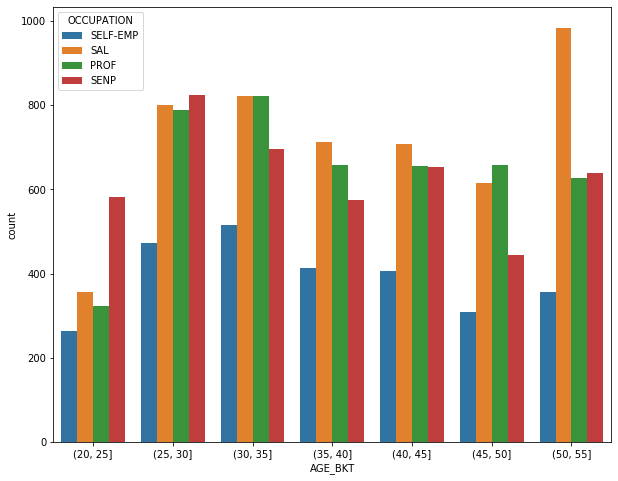

In [49]:
plt.figure(figsize=(10,8))
sns.countplot(non_target_df['AGE_BKT'], hue = non_target_df['OCCUPATION'])

* Professionals are not usually interested in taking loans.
* Very small number of professionals take loans in the 50-55 age group
* The size of self employed people who do not take loans in every age group is low.

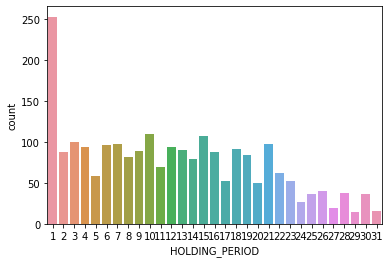

In [50]:
sns.countplot(target_df['HOLDING_PERIOD'])

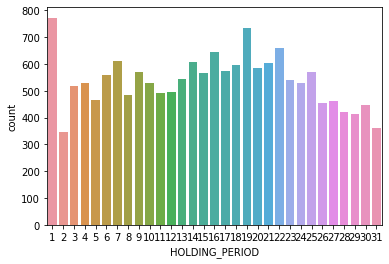

In [51]:
sns.countplot(non_target_df['HOLDING_PERIOD'])

* We see that people with lower holding periods responded to the scheme.

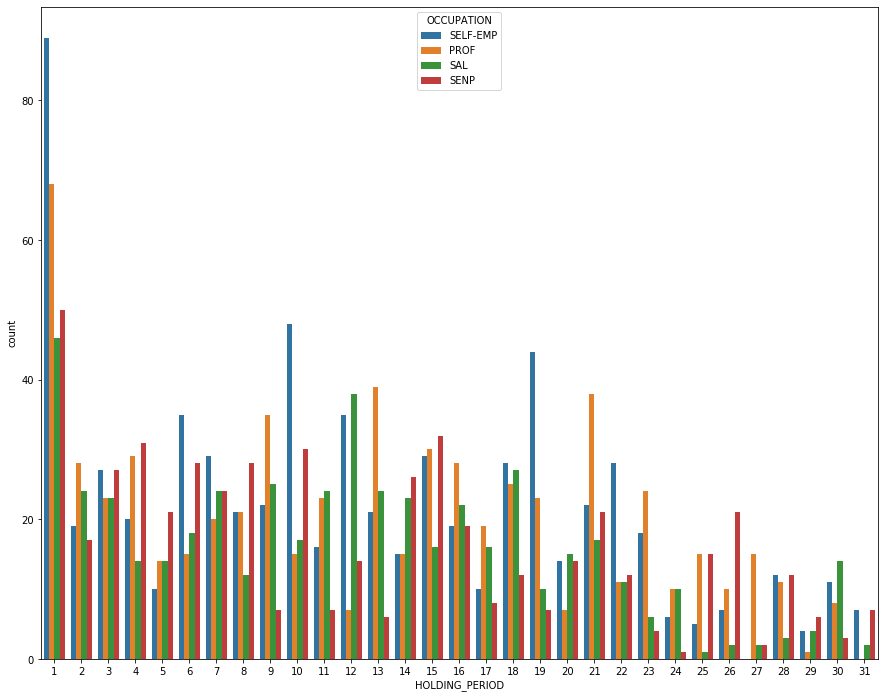

In [52]:
plt.figure(figsize=(15,12))
sns.countplot(target_df['HOLDING_PERIOD'], hue = target_df['OCCUPATION'])

* We see that self employed with lower holding periods take more loans.
* Most loans are taken when the holding period is 1.

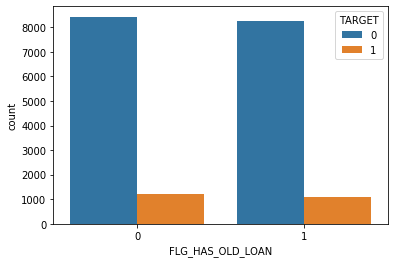

In [53]:
sns.countplot(df['FLG_HAS_OLD_LOAN'], hue = df['TARGET'])

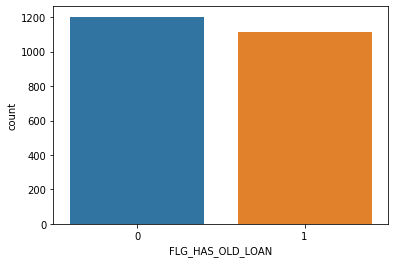

In [54]:
sns.countplot(target_df['FLG_HAS_OLD_LOAN'])

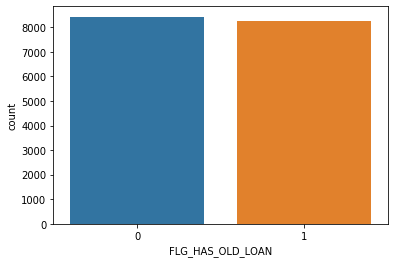

In [55]:
sns.countplot(non_target_df['FLG_HAS_OLD_LOAN'])

We see that having an old loan doesn't affect being interested in taking a second one much. This is weird as it should affect that decision.

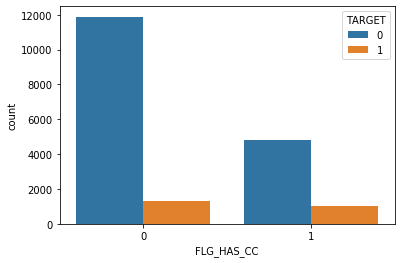

In [56]:
sns.countplot(df['FLG_HAS_CC'], hue = df['TARGET'])

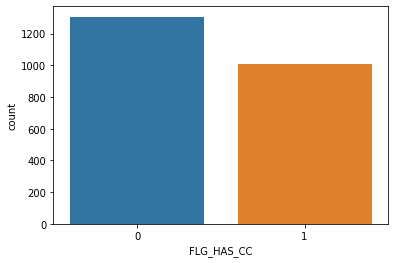

In [57]:
sns.countplot(target_df['FLG_HAS_CC'])

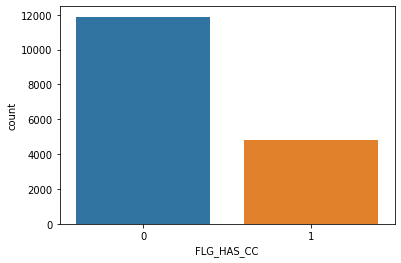

In [58]:
sns.countplot(non_target_df['FLG_HAS_CC'])

People with credit cards responded that they prefer the new scheme. However a lot of people do not own credit cards.

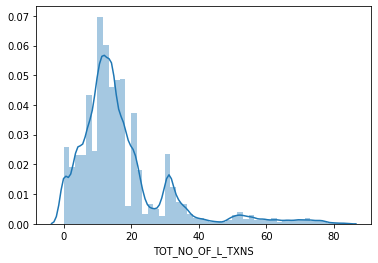

In [59]:
sns.distplot(df['TOT_NO_OF_L_TXNS'])

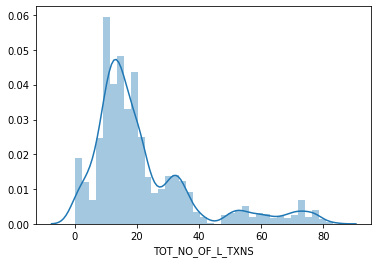

In [60]:
sns.distplot(target_df['TOT_NO_OF_L_TXNS'])

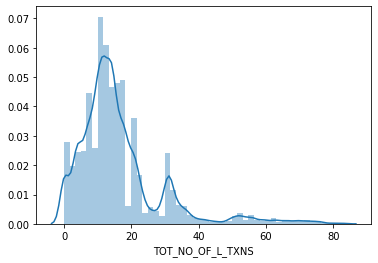

In [61]:
sns.distplot(non_target_df['TOT_NO_OF_L_TXNS'])

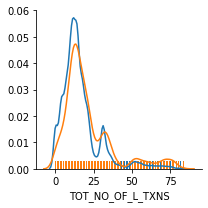

In [62]:
g = sns.FacetGrid(df, hue = 'TARGET')
g = g.map(sns.distplot, 'TOT_NO_OF_L_TXNS', hist = False, rug = True)


We see that the distributions of people who take and dont take loans are almost similar. Also, these graphs are Right Skewed, meaning the outliers are extremely large values.

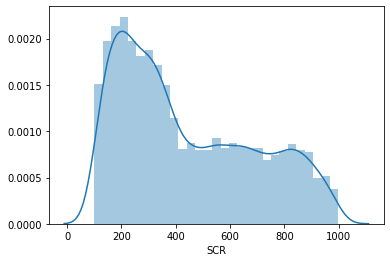

In [63]:
sns.distplot(df['SCR'])

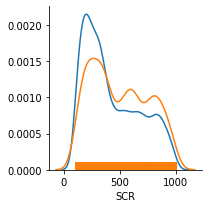

In [64]:
g = sns.FacetGrid(df, hue = 'TARGET')
g = g.map(sns.distplot, 'SCR', hist = False, rug = True)

Again we see that the distributions are similar but the counts are a little different because of the bias in the dataset.

AGE


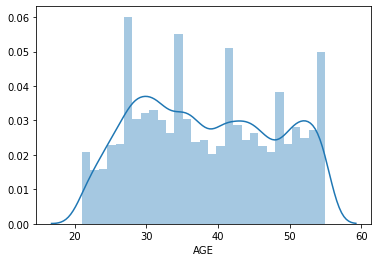

BALANCE


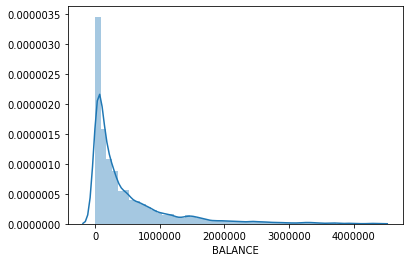

SCR


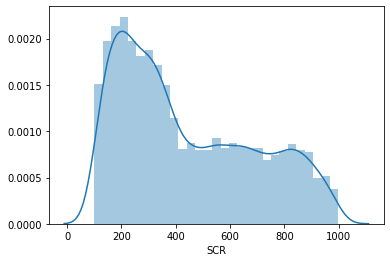

HOLDING_PERIOD


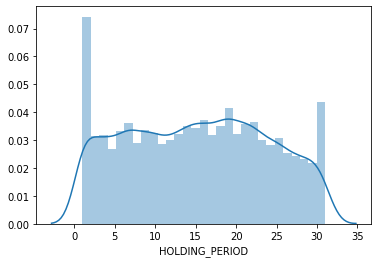

LEN_OF_RLTN_IN_MNTH


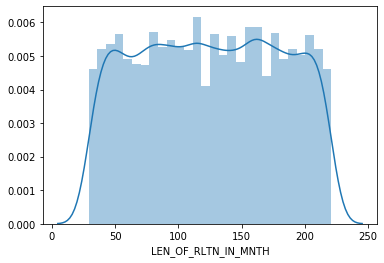

NO_OF_L_CR_TXNS


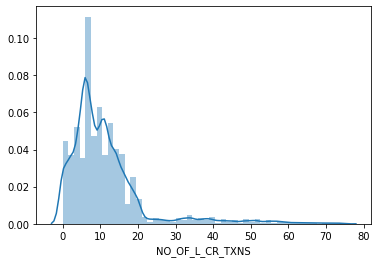

NO_OF_L_DR_TXNS


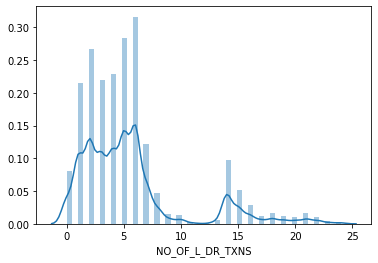

TOT_NO_OF_L_TXNS


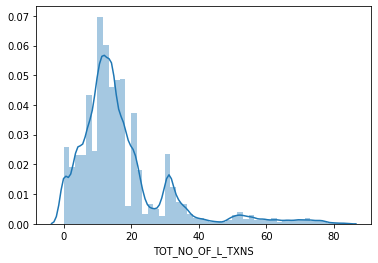

NO_OF_BR_CSH_WDL_DR_TXNS


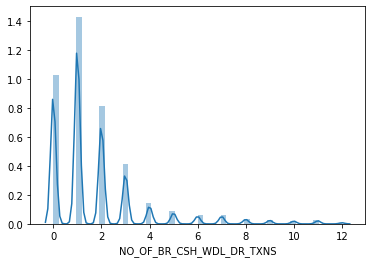

NO_OF_ATM_DR_TXNS


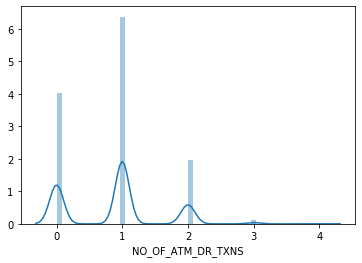

NO_OF_NET_DR_TXNS


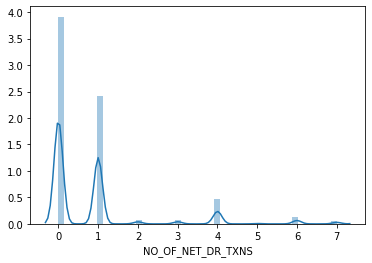

NO_OF_CHQ_DR_TXNS


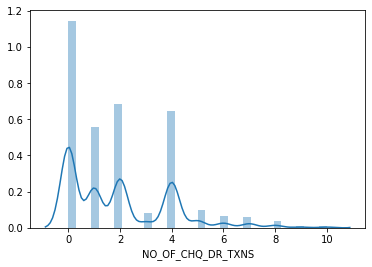

FLG_HAS_CC


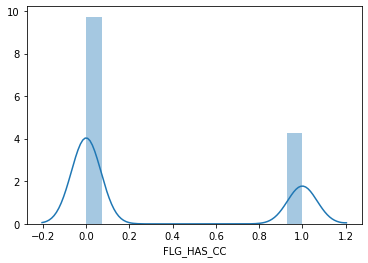

AMT_ATM_DR


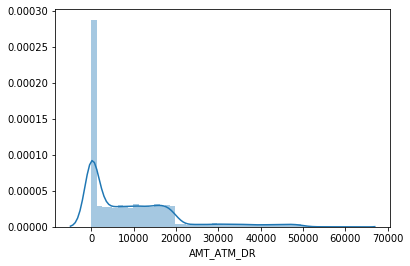

AMT_BR_CSH_WDL_DR


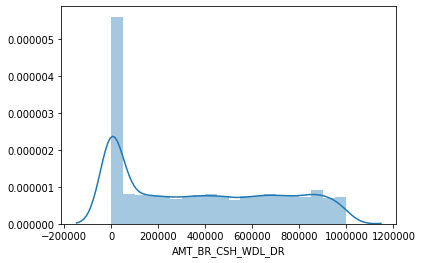

AMT_CHQ_DR


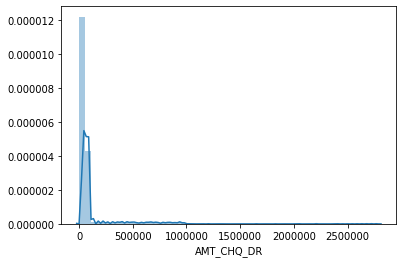

AMT_NET_DR


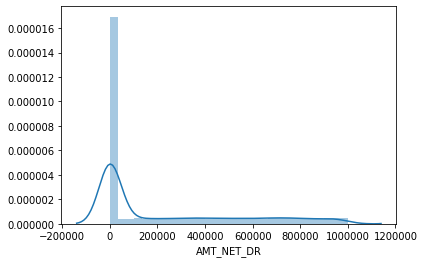

AMT_L_DR


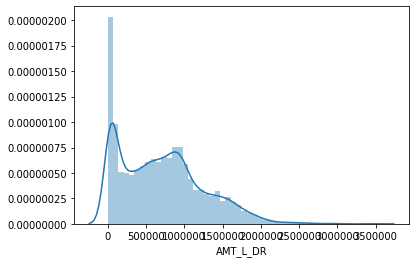

AVG_AMT_PER_ATM_TXN


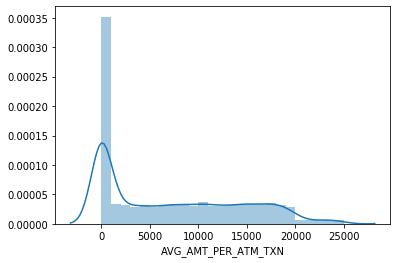

AVG_AMT_PER_CSH_WDL_TXN


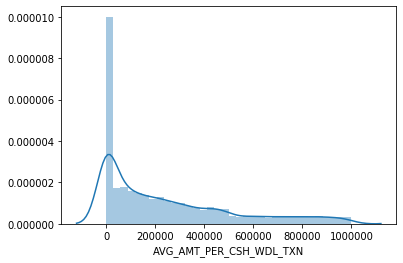

AVG_AMT_PER_CHQ_TXN


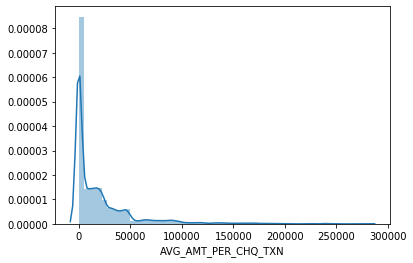

AVG_AMT_PER_NET_TXN


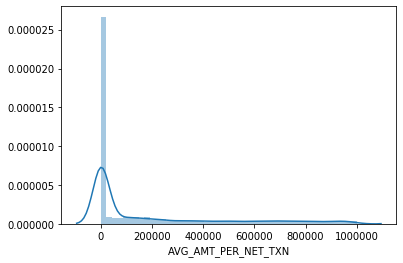

In [65]:
for i in num_cols:  
    if i not in ['NO_OF_MOB_DR_TXNS','AMT_MOB_DR','FLG_HAS_ANY_CHGS',
                 'AMT_OTH_BK_ATM_USG_CHGS','AMT_MIN_BAL_NMC_CHGS','NO_OF_IW_CHQ_BNC_TXNS',
                 'NO_OF_OW_CHQ_BNC_TXNS','AVG_AMT_PER_MOB_TXN','FLG_HAS_NOMINEE']:
        print(i)
        sns.distplot(df[i])
        plt.show()

We see that all the distributions are heavily right skewed. But we can assume the Central Limit Theorem as we have a large amount of data points in our sample and we can calculate the mean and variance.

In [66]:
bw_0_cols=['NO_OF_MOB_DR_TXNS','AMT_MOB_DR','FLG_HAS_ANY_CHGS',
           'NO_OF_IW_CHQ_BNC_TXNS','NO_OF_OW_CHQ_BNC_TXNS',
           'AVG_AMT_PER_MOB_TXN','FLG_HAS_NOMINEE'] 

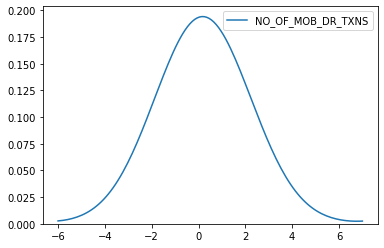

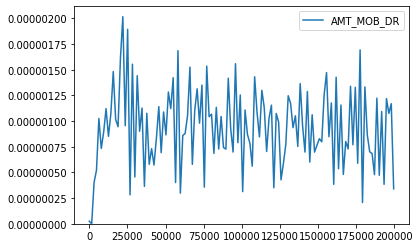

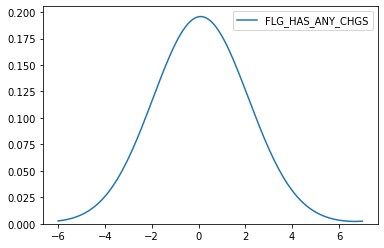

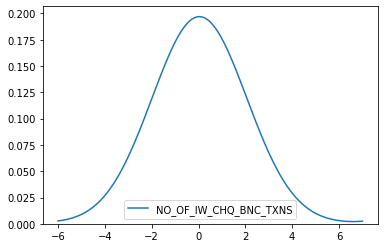

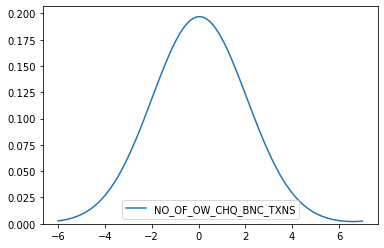

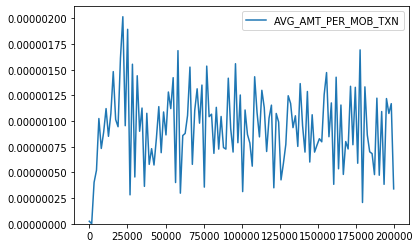

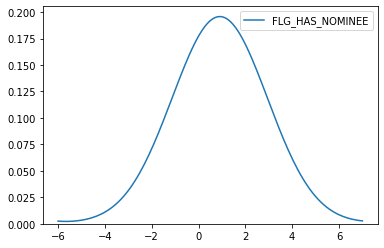

In [67]:
for i in bw_0_cols: 
    sns.kdeplot(df[i],bw=2)
    plt.show()

The above columns have ther bandwidth = 0 that is if above columns are passed in distplot or kdeplot, the seaborn module is **not** be able to determine the bandwith hence we had to pass bandwidth manually.

## Feature Engineering - Modifying Columns

In [68]:
df['AMT_FINED'].value_counts()

0      18843
170      149
Name: AMT_FINED, dtype: int64

In [69]:
df['CHQ_FINED'].value_counts()

0    17429
1     1520
2       43
Name: CHQ_FINED, dtype: int64

In [70]:
df['AMT_FINED'].replace(to_replace=170,value=1,inplace=True)
df.loc[df['CHQ_FINED'] == 2, 'CHQ_FINED'] = 1

Since there are only 2 unique values in the aforementioned columns after outlier removal, we are converting them into categorical columns

## Relationship with TARGET column for Categorical Columns 

### Chi-squared test for Categorical Columns


### Hypothesis

H0: the cloumns in cat_cols are independent with the TARGET variable <br>
Ha: The columns in cat_cols are dependent with TARGET column

In [71]:
cat_cols=['GENDER', 'OCCUPATION', 'ACC_TYPE',
          'AGE_BKT','FLG_HAS_CC','FLG_HAS_ANY_CHGS',
          'FLG_HAS_NOMINEE','FLG_HAS_OLD_LOAN',
          'AMT_FINED','CHQ_FINED']

In [72]:
from scipy.stats import chi2_contingency
def to_cr(df,col1):
    
    '''
        This function takes a dataframe and compares each column with the target using the Chi Squared test
        to see if the Target is dependent on particular categorical column or not.
        Null: Target is Dependent on the Column
        Alternative: Target is Independent of the Column
    '''
    
    data=pd.crosstab(df[col1],df['TARGET'])
    stat,p,dof,expected=chi2_contingency(data) 
    alpha=0.05 # we  can say our hypothesis with 95% confident 
    if p <= alpha: 
        print("\nTARGET is dependent on {} (Reject Null Hypothesis)".format(col1)) 
    else: 
        print("\nTARGET is independent of {} (Fail to Reject Null Hypothesis)".format(col1))

In [73]:
for i in cat_cols:
    to_cr(df,i)


TARGET is dependent on GENDER (Reject Null Hypothesis)

TARGET is dependent on OCCUPATION (Reject Null Hypothesis)

TARGET is dependent on ACC_TYPE (Reject Null Hypothesis)

TARGET is dependent on AGE_BKT (Reject Null Hypothesis)

TARGET is dependent on FLG_HAS_CC (Reject Null Hypothesis)

TARGET is dependent on FLG_HAS_ANY_CHGS (Reject Null Hypothesis)

TARGET is independent of FLG_HAS_NOMINEE (Fail to Reject Null Hypothesis)

TARGET is independent of FLG_HAS_OLD_LOAN (Fail to Reject Null Hypothesis)

TARGET is independent of AMT_FINED (Fail to Reject Null Hypothesis)

TARGET is dependent on CHQ_FINED (Reject Null Hypothesis)


 From chi-squared test we can also drop FLG_HAS_NOMINEE,  FLG_HAS_OLD_LOAN & AMT_FINED column as the TARGET column is independent of it

## Relationship with TARGET column for Numerical Columns 

### ANOVA F Test for Numerical Columns

### Hypothesis

H0: the numeric columns are independent with the TARGET variable <br>
Ha: The numeric columns are dependent with TARGET column

In [74]:
from scipy.stats import f_oneway

def to_check(col1):
    
    '''
        Anova F Test to see in Target is related to the given Column or not.
        Null: Target is Dependent on the Column
        Alternative: Target is Independent of the Column
    '''
    
    F,p=f_oneway(df[col1],df['TARGET'])
    alpha=0.05 # we  can say our hypothesis with 95% confident 
    if p<=alpha: 
        print("\nTARGET is dependent on {} (Reject Null Hypothesis)".format(col1)) 
    else: 
        print("\nTARGET is independent of {} (Fail to Reject Null Hypothesis)".format(col1))

In [75]:
df_num=df[['AGE','BALANCE','SCR','HOLDING_PERIOD','LEN_OF_RLTN_IN_MNTH','TOT_NO_OF_L_TXNS','AMT_L_DR','TOT_NUM_OF_DR_TXNS']]

In [76]:
for i in df_num.columns:
    to_check(i)


TARGET is dependent on AGE (Reject Null Hypothesis)

TARGET is dependent on BALANCE (Reject Null Hypothesis)

TARGET is dependent on SCR (Reject Null Hypothesis)

TARGET is dependent on HOLDING_PERIOD (Reject Null Hypothesis)

TARGET is dependent on LEN_OF_RLTN_IN_MNTH (Reject Null Hypothesis)

TARGET is dependent on TOT_NO_OF_L_TXNS (Reject Null Hypothesis)

TARGET is dependent on AMT_L_DR (Reject Null Hypothesis)

TARGET is dependent on TOT_NUM_OF_DR_TXNS (Reject Null Hypothesis)


## Removing Columns

In [77]:
df.drop(labels = ['CUST_ID','random'], axis=1, inplace = True)
df.drop(labels = ['AMT_OTH_BK_ATM_USG_CHGS','AMT_MIN_BAL_NMC_CHGS'],axis=1,inplace=True)

Dropping the CUST_ID as it is not required, random column as it is just a random number associated with the dataset and 'AMT_OTH_BK_ATM_USG_CHGS','AMT_MIN_BAL_NMC_CHGS' were combined into a single column 'AMT_FINED' so they are now redundant as well.

We checked for high correlation earlier. We can drop some of the columns that had high correlation.

Let us just pick the columns that are common in some of these and drop the rest.
* Columns to keep:
    * NO_OF_L_DR_TXN
    * NO_OF_ATM_DR_TXNS 
* Columns to drop:
    * AMT_ATM_DR
    * AMT_BR_CSH_WDL_DR
    * NO_OF_L_CR_TXNS
    * NO_OF_ATM_DR_TXNS
    * NO_OF_MOB_DR_TXNS
    * AMT_CHQ_DR
    * AMT_NET_DR
    * AMT_MOB_DR
    * NO_OF_NET_DR_TXNS
    * NO_OF_MOB_DR_TXNS

In [78]:
new_numeric = list(df.select_dtypes(include = ['int64', 'float64']).columns)
print(len(new_numeric))

34


We removed columns with really high correlation.

## Feature Selection

In [79]:
cat_cols.append('TARGET') # Adding the Target to the categorical column list
df_cat=df[cat_cols] 

# One Hot Encoding some categorical columns
occ = pd.get_dummies(df_cat['OCCUPATION'])
gen = pd.get_dummies(df_cat['GENDER'])
acc_type = pd.get_dummies(df_cat['ACC_TYPE'])
df_cat1 = pd.concat([occ,gen,acc_type], axis=1)

In [80]:
for i in df_cat1.columns: # Adding the column values to the second loop.
    df_cat[i] = df_cat1[i].values

In [81]:
df_cat.drop(labels=['OCCUPATION','GENDER','ACC_TYPE'],axis=1,inplace=True) # Dropping the original columns after encoding

In [82]:
# Applying Min Max Scaling as it fit our data the best

mms = MinMaxScaler()
df_num_mms = mms.fit_transform(df_num)
df_num_mms = pd.DataFrame(df_num_mms, columns = df_num.columns)

In [83]:
df_final_mms = df_num_mms.copy()

In [84]:
df_final_mms.isna().sum()

AGE                    0
BALANCE                0
SCR                    0
HOLDING_PERIOD         0
LEN_OF_RLTN_IN_MNTH    0
TOT_NO_OF_L_TXNS       0
AMT_L_DR               0
TOT_NUM_OF_DR_TXNS     0
dtype: int64

In [85]:
df_final_n_scaling = df_num.copy()

In [86]:
df_final_n_scaling.isna().sum()

AGE                    0
BALANCE                0
SCR                    0
HOLDING_PERIOD         0
LEN_OF_RLTN_IN_MNTH    0
TOT_NO_OF_L_TXNS       0
AMT_L_DR               0
TOT_NUM_OF_DR_TXNS     0
dtype: int64

In [87]:
df_num1=df_num.copy()

In [88]:
df_num1.var().sort_values()

TOT_NUM_OF_DR_TXNS     2.226787e+01
HOLDING_PERIOD         7.429867e+01
AGE                    9.195724e+01
TOT_NO_OF_L_TXNS       1.861731e+02
LEN_OF_RLTN_IN_MNTH    3.021572e+03
SCR                    6.259260e+04
AMT_L_DR               2.957055e+11
BALANCE                4.497394e+11
dtype: float64

In [89]:
df_num1['AMT_L_DR'] = mms.fit_transform(df_num1[['AMT_L_DR']])

In [90]:
df_num1['BALANCE'] = mms.fit_transform(df_num1[['BALANCE']])

In [91]:
df_final_mms.drop(labels = ['AGE'], axis = 1,inplace = True) 

In [92]:
df_final_mms['TARGET'] = df_cat['TARGET'].values 

In [93]:
X_train, X_test, y_train, y_test = train_test_split(df_final_mms.drop(columns = ['TARGET']), df_final_mms[['TARGET']],test_size=0.2,random_state=42)

In [94]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(15193, 7) (3799, 7) (15193, 1) (3799, 1)


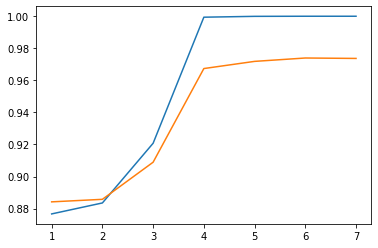

In [95]:
# Getting the columns and selecting K best features

column_names = df_final_mms.drop(columns = ['TARGET']).columns
no_of_features = []
r_squared_train = []
r_squared_test = []

for k in range(1,8, 1):  # This loop finds the best value for k, the number of features to predict the data.
    selector = SelectKBest(f_classif, k = k)
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    cf = ExtraTreesClassifier()
    cf.fit(X_train_transformed, y_train)
    
    no_of_features.append(k)
    
    r_squared_train.append(cf.score(X_train_transformed, y_train))
    r_squared_test.append(cf.score(X_test_transformed, y_test))
    
sns.lineplot(x = no_of_features, y = r_squared_train, legend = 'full')
sns.lineplot(x = no_of_features, y = r_squared_test, legend = 'full')


We see that k = 4 gives the best results and so, we will pick that value.

In [96]:
selector = SelectKBest(f_classif, k = 4)

X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)

column_names[selector.get_support()]

Index(['SCR', 'HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 'TOT_NUM_OF_DR_TXNS'], dtype='object')

The 4 best features we got are:
* SCR: The generic Marketing score that tells us how well the individual does when it comes to spending money and paying it back. 
* The second feature is the HOLDING PERIOD which tells us how long before a person performs transactions. This is also intuitive as the more people spend, the more money they need. These are the people who are interested in taking personal loans.
* TOT_NO_OF_L_TXNS: The total Number of transactions which imply how many times people make transactions. This can mean that the their balance is low, which may lead them to be interested in taking personal loans.
* TOT_NUM_OF_DR_TXNS: The total number of debit transactions means how many times money is debited from their accounts. This in turn leads them to have less balance and be interested in taking personal loans.

In [97]:
for i in df_cat.columns: 
    df_final_mms[i]=df_cat[i].values

In [98]:
le = LabelEncoder()
df_final_mms['AGE_BKT'] = le.fit_transform(df_final_mms['AGE_BKT'])

In [99]:
df_final_mms.drop('FLG_HAS_NOMINEE',axis=1,inplace=True) 
df_final_mms.drop('FLG_HAS_OLD_LOAN',axis=1,inplace=True) 

In [100]:
X = df_final_mms[['BALANCE','SCR', 'HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 
                'TOT_NUM_OF_DR_TXNS','AGE_BKT', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 
                'CHQ_FINED', 'PROF',
                'SAL', 'SELF-EMP', 'SENP', 'F', 'M', 'O', 'CA', 'SA']]
y = df_final_mms['TARGET']

##  PCA 

It is recommended to use dimensionality reduction techniques like PCA for clustering Algorithms as will make the data more linear.

In [101]:
pca=PCA(0.95)
x1=pca.fit_transform(X)

# We used 0.95 to get 95% of the information is given by the data.

In [102]:
train_X,test_X,train_y,test_y = train_test_split(X,y,test_size=0.2,random_state=42)

## Modelling and Evaluation

### (i) K-Means Clustering

#### Process

1. First, n random centroids (we will specify this in parameter) is assigned for the data points. 

2. Then when the data points are assingned the euclidian distance is calculated b/w randomly assigned centroid and new data point. 

3. After step 2 new centroid is assigned for those points.  

4. These steps are repeated until n_clusters are formed. 

###### To find the optimal numbers of clusters we plot a graph callled as elbow plot here we will see the point from where the graph line tends to stabilize and that very point is marked as n_clusters for k-means 

In [103]:
dd = X.to_numpy()

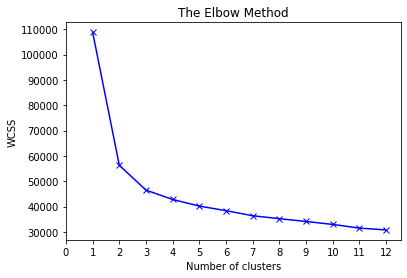

In [104]:
# This will calculate the Within Sum Of Squares to help find the optimal value of Kmeans Clustering.
# We use init - 'k-means++' to avoid the bad initial cluster centroid problem
### Elbow plot #### 

wcss = []
for i in range(1, 13):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
    kmeans.fit(dd)   #x is features
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 13), wcss,'bx-')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12])
plt.ylabel('WCSS')
plt.show()

##### From the above graph we can see that graph stabilizing after 5 no. of clusters

In [105]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 0)
y_kmeans = kmeans.fit_predict(x1)  

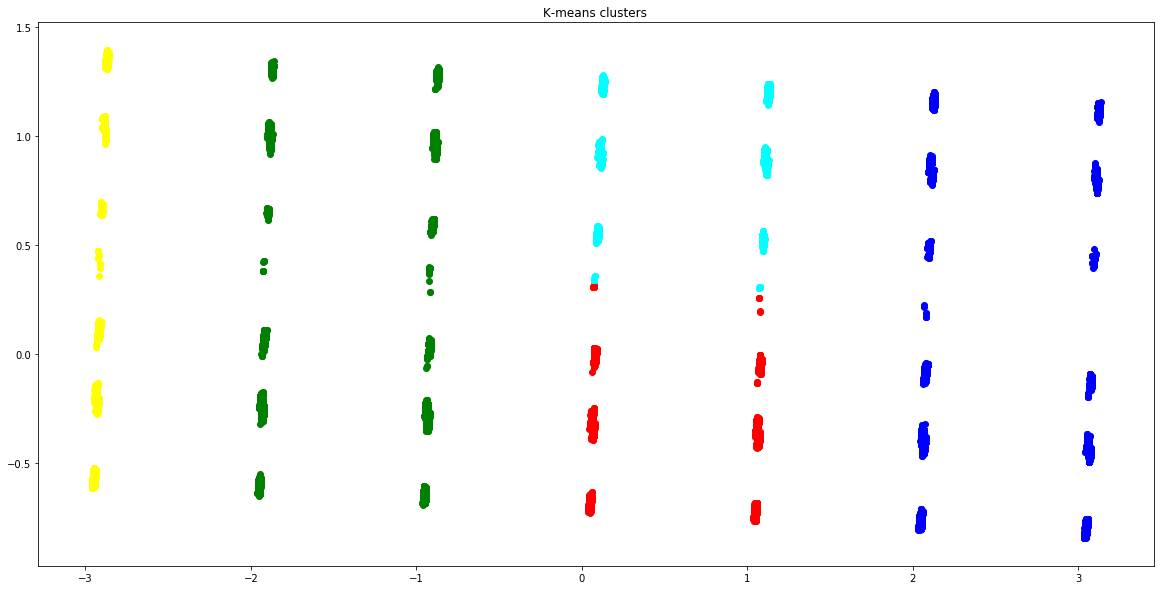

In [106]:
plt.figure(figsize=(20,10))

for i in range(0, x1.shape[0]):
    
    if kmeans.labels_[i] == 1:
        c1 = plt.scatter(x1[i,0],x1[i,1],c='red')
    elif kmeans.labels_[i] == 0:
        c2 = plt.scatter(x1[i,0],x1[i,1],c='green')
    elif kmeans.labels_[i] == 2:
        c3 = plt.scatter(x1[i,0],x1[i,1],c='blue')
    elif kmeans.labels_[i] == 3:
        c4= plt.scatter(x1[i,0],x1[i,1],c='cyan')
    elif kmeans.labels_[i] == 4:
        c5= plt.scatter(x1[i,0],x1[i,1],c='yellow')

plt.title('K-means clusters ')
plt.show()

The 2D plot is not intuitive and so, we shall try to plot a 3D graph and see how it goes.

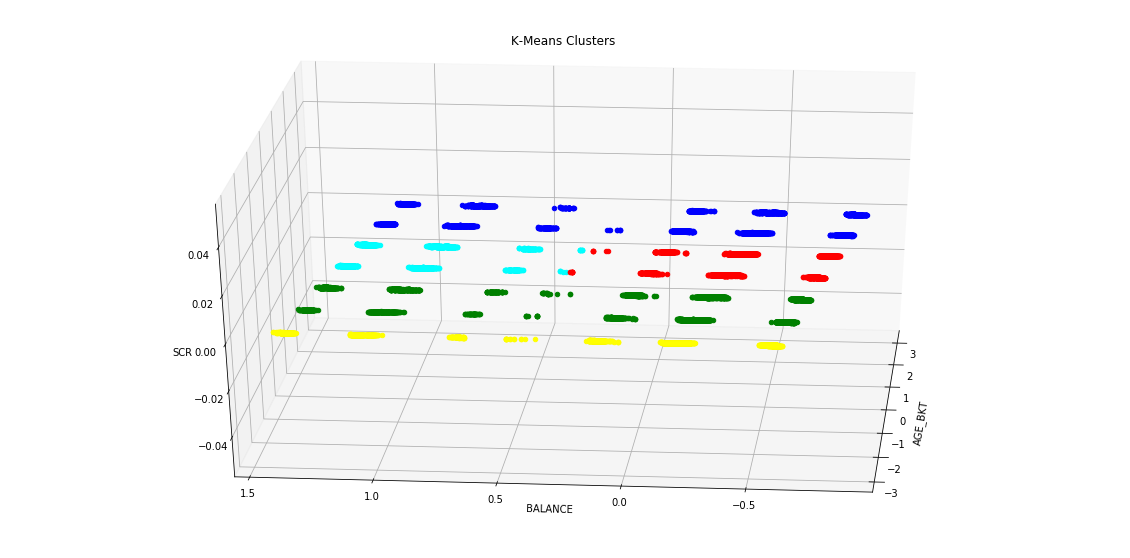

In [107]:
fig = plt.figure(figsize=(20,10))

ax = fig.add_subplot(111, projection='3d')

for i in range(0, x1.shape[0]):
    if kmeans.labels_[i] == 1:
        c1 =ax.scatter(x1[i,0],x1[i,1],c='red')
    elif kmeans.labels_[i] == 0:
        c2 = ax.scatter(x1[i,0],x1[i,1],c='green')
    elif kmeans.labels_[i] == 2:
        c3 =ax.scatter(x1[i,0],x1[i,1],c='blue')
    elif kmeans.labels_[i] == 3:
        c4= ax.scatter(x1[i,0],x1[i,1],c='cyan')
    elif kmeans.labels_[i] == 4:
        c5= ax.scatter(x1[i,0],x1[i,1],c='yellow')

plt.title('K-Means Clusters ') 
plt.xlabel('AGE_BKT') 
plt.ylabel('BALANCE') 
ax.set_zlabel('SCR')
ax.view_init(30, 185) 
plt.show()

The 3D plot did not seem to affect the data much and we could not infer anything useful from it. So, we will try to use other clustering algorithms to find profitable segments for our bank.

---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

### DBSCAN (Density-based spatial clustering of applications with noise)

###### Process

1. There are 2 key words here minimum points and epsilon  

1. DBSCAN creates a circle of **epsilon** radius around every data point and classifies them into **Core** point, **Border** point, and Noise.

2. A data point is a **Core** point if the circle around it contains atleast 'minPoints' number of points.

3. If the number of points inside the circle of a data point is less than 'minPoints' then it is classified as a **Border point**.  

4. If there are no data points around any data point within **epsilon** radius, then it's treated as **Noise**.

5. The main advantage of DBSCAN is that it has a notion of noise, and is robust to outliers.

##### Here we also use a sklearn metric module called "silhouette" which is nothing but a validation technique for clustering algorithm.

In [108]:
for n_clusters in range(2,9): 
    cl=KMeans(n_clusters=n_clusters,random_state=42) 
    cluster_labels=cl.fit_predict(x1) 
    
    #the  silhouette score will provide avg values for all samples 
    ## this gives us idea about density and seperation fromed by clusters  
    silhouette_avg= silhouette_score(x1,cluster_labels)
    print('n_clusters = ',n_clusters,'The avg silhouette score is = ',silhouette_avg) 
    
    #calc all silhouette score for each sample
    sample_silhouette_values=silhouette_samples(x1,cluster_labels)

n_clusters =  2 The avg silhouette score is =  0.39912920118934125
n_clusters =  3 The avg silhouette score is =  0.26821378544289415
n_clusters =  4 The avg silhouette score is =  0.22882766249266434
n_clusters =  5 The avg silhouette score is =  0.22531493143253115
n_clusters =  6 The avg silhouette score is =  0.20494619829642113
n_clusters =  7 The avg silhouette score is =  0.18227471722862992
n_clusters =  8 The avg silhouette score is =  0.19152554391871288


###### From the above we see that n_clusters = 2 is the optimal number of clusters 

In [109]:
range_eps=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] 

for i in range_eps: 
    db=DBSCAN(eps=i,min_samples=10).fit(x1) 
    core_samples_mask=np.zeros_like(db.labels_,dtype=bool) 
    core_samples_mask[db.core_sample_indices_]=True 
    labels=db.labels_ 
    silhouette_avg=silhouette_score(x1,labels) 
    
    print('For eps value = {}\tThe Average Silhouette is: {}'.format(i, silhouette_avg))

For eps value = 0.1	The Average Silhouette is: 0.2991665727119908
For eps value = 0.2	The Average Silhouette is: 0.448887683677012
For eps value = 0.3	The Average Silhouette is: 0.5001762985618093
For eps value = 0.4	The Average Silhouette is: 0.5158296673471158
For eps value = 0.5	The Average Silhouette is: 0.5234824110336365
For eps value = 0.6	The Average Silhouette is: 0.5380547789285242
For eps value = 0.7	The Average Silhouette is: 0.5464069335535948
For eps value = 0.8	The Average Silhouette is: 0.5398936541196739
For eps value = 0.9	The Average Silhouette is: 0.5422312727234697
For eps value = 1	The Average Silhouette is: -0.03701837061006416


###### Here we can see that the eps optimal value is 0.7

In [110]:
min_samp=[1,2,3,4,5,6,7,280,300,310,350,380,400,410,411,412] 

for i in min_samp:  
    print('min_samp_val = ',i)
    db = DBSCAN(eps = 0.7,min_samples=i).fit(x1) 
    core_samples_mask=np.zeros_like(db.labels_,dtype = bool) 
    core_samples_mask[db.core_sample_indices_] = True 
    
    labels = set([label for label in db.labels_ if label >= 0])
    print('The clusters are :{}'.format(len(set(labels))))

min_samp_val =  1
The clusters are :385
min_samp_val =  2
The clusters are :338
min_samp_val =  3
The clusters are :301
min_samp_val =  4
The clusters are :274
min_samp_val =  5
The clusters are :252
min_samp_val =  6
The clusters are :241
min_samp_val =  7
The clusters are :233
min_samp_val =  280
The clusters are :10
min_samp_val =  300
The clusters are :8
min_samp_val =  310
The clusters are :7
min_samp_val =  350
The clusters are :6
min_samp_val =  380
The clusters are :3
min_samp_val =  400
The clusters are :3
min_samp_val =  410
The clusters are :3
min_samp_val =  411
The clusters are :3
min_samp_val =  412
The clusters are :2


###### The best min_sample value is 412 as it gives total number of clusters as 2 which we recived at the begining of kmeans we did

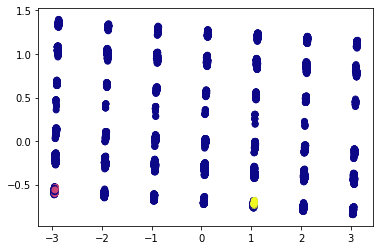

In [111]:
dbscan = DBSCAN(eps = 0.7, min_samples = 412)
clusters = dbscan.fit_predict(x1) 
plt.scatter(x1[:, 0], x1[:, 1], c = clusters, cmap = "plasma")

We are not able to intuite much from this clustering as well. We shall try a third clustering method.

----------------------------------------------------------------------------------------------------------------------------------------

## Hierarchical Clustering (Agglomerative Clustering)

###### Process

1. First there will be n clusters where n is the number of datapoints.
2. The algorithm will calculate the euclidean distance or dis-similarity b/w the nearest data points to form a cluster in order to give a total n-1 clusters.
3. Furthermore, other data points will also perform same method to form clusters giving us n-2 clusters in total. 
4. step 2 and step 3 will be repated until we get a single cluster.

## We use the Dendrogram to find the optimal number of clusters


#### We find the number of clusters by identifying the longest vertical line which does not cut the extended or hypothetical horizontal line 
#### We then cut that vertical line and see the number of lines it cuts which will give us the number of clusters

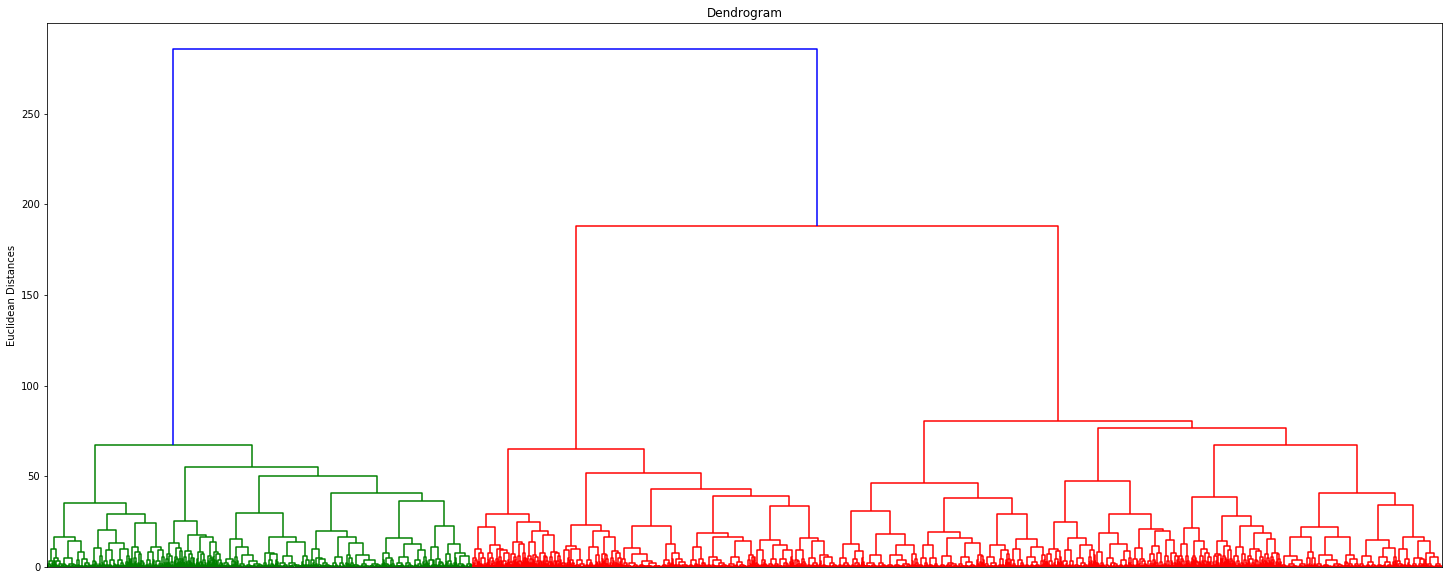

In [112]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(25,10))
dendrogram = sch.dendrogram(sch.linkage(x1, method = 'ward'))
plt.title('Dendrogram')
plt.tick_params(axis='x',which='both',bottom=False,top=False,labelbottom=False)
plt.ylabel('Euclidean Distances')
plt.show()

From the above Dendrogram we can obtain the number of clusters to be taken, which is **3**.

###### Applying Agglomerative Clustering algorithm

In [113]:
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(x1)

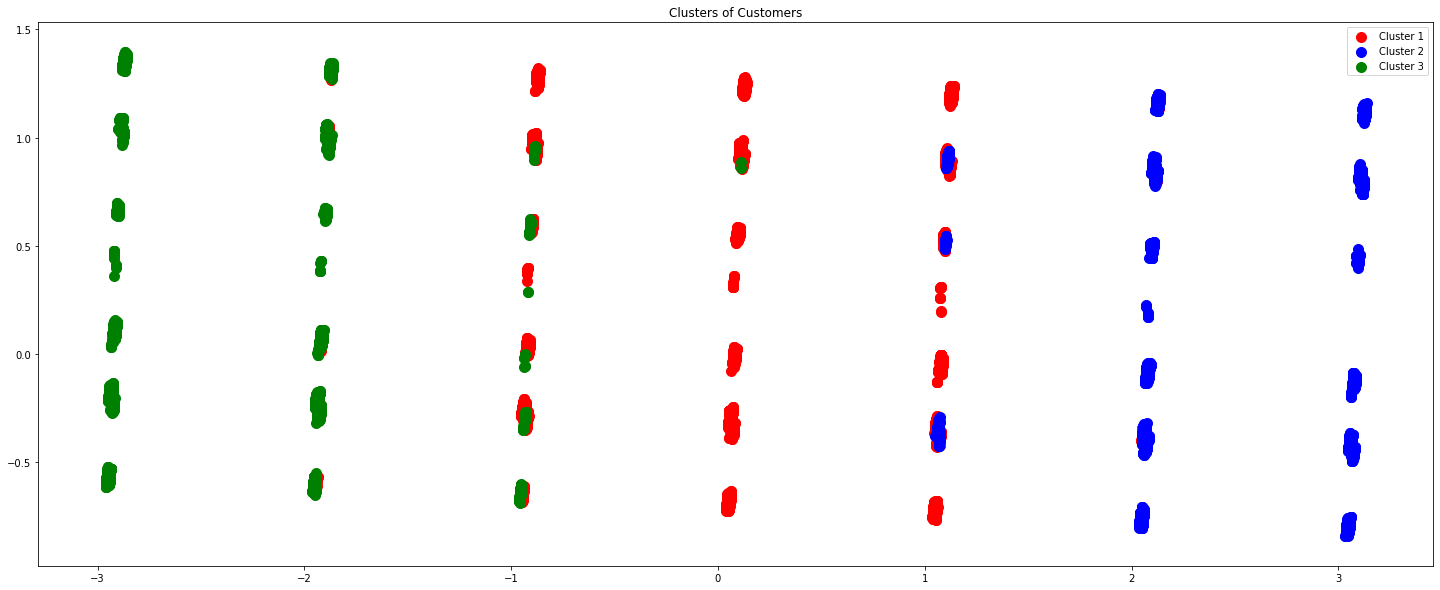

In [114]:
plt.figure(figsize = (25,10))
plt.scatter(x1[y_hc == 0, 0],x1[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x1[y_hc == 1, 0],x1[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x1[y_hc == 2, 0], x1[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.title('Clusters of Customers')
plt.legend()
plt.show()

#### Hierarchical clustering seems to be the best option for clustering in our case as 
* The dendrograms show us the optimal numbers of clusters is 3
* Each cluster signifies the customer segmentation that we need to focus on 
* From our previous analysis we also saw the following things :
    * People with high SCR should be targeted
    * People with high balance should be targeted
    * People with high holding period should also be targeted <br>


All of the above points were displayed by the cluster in green and that is our target segment

Adding the cluster column to our dataframe.

We will perform analysis based on the cluster column as well.

In [115]:
clusters = pd.DataFrame(data = y_hc, columns = ['Cluster'])

df_final_mms['Cluster'] = clusters['Cluster'].values

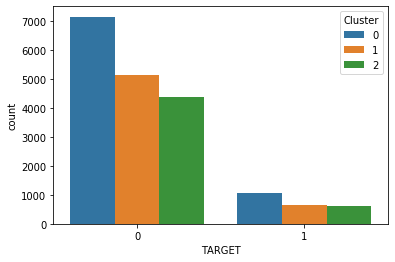

In [116]:
sns.countplot(x='TARGET', data= df_final_mms, hue = 'Cluster')

As we already have a biased data, we see that the clusters for the customers who were interested in the loan are low. However, We also see that clusters 1 and 2 have near the same number of customers.

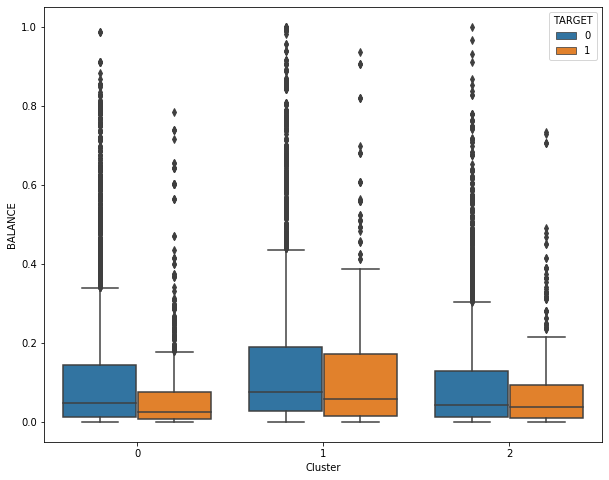

In [117]:
plt.figure(figsize=(10,8))
sns.boxplot(x='Cluster', y = 'BALANCE', data=df_final_mms, hue = 'TARGET')

We see that the people in cluster 1 (second cluster) have more balance on average and the number of customers who were interested have almost equivalent balance. This should be our Target cluster. For the other clusters, we might need to come up with different schemes.

In [118]:
df['Cluster'] = df_final_mms['Cluster']

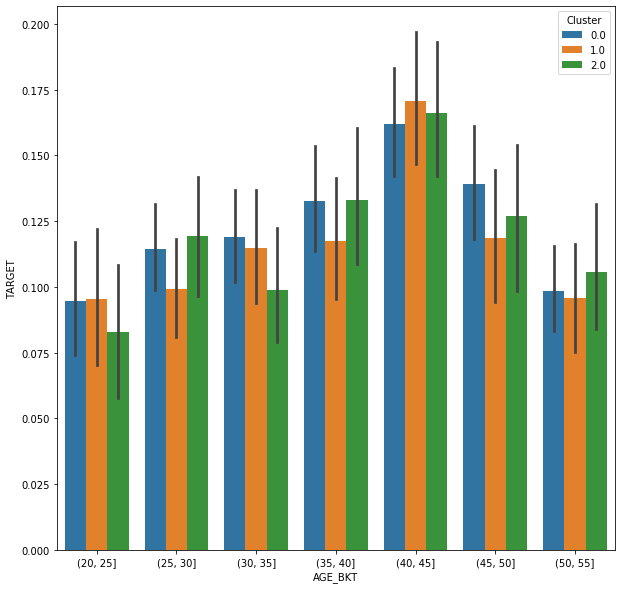

In [119]:
plt.figure(figsize=(10,10))
sns.barplot(x='AGE_BKT', y = 'TARGET', data= df, hue = 'Cluster')
plt.show()

We see that the age group 40-45 have the most number of people and it has more people in cluster 1.

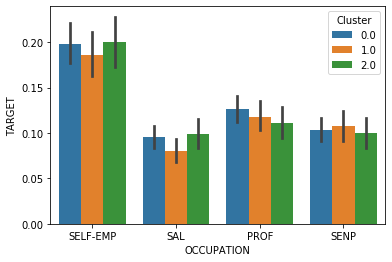

In [120]:
sns.barplot(x='OCCUPATION', y='TARGET', data= df, hue = 'Cluster')
plt.show()

We see that a lot of people again belong to Self Employed group and belong to cluster 0 and 2 but cluster 1 is not that far off.

### Classification Models based on TARGET column

In [121]:
log_model = LogisticRegression(random_state=42)
log_model.fit(train_X,train_y)
lrt_score = log_model.score(train_X,train_y)
lr_score = log_model.score(test_X,test_y)

In [122]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(train_X,train_y)
dtct_score = dtc.score(train_X,train_y)
dtc_score = dtc.score(test_X,test_y)

In [123]:
svc = SVC(kernel='rbf',random_state=42)
svc.fit(train_X,train_y)
svct_score = svc.score(train_X,train_y)
svc_score = svc.score(test_X,test_y)

In [124]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train_X,train_y)
knnt_score = knn.score(train_X,train_y)
knn_score = knn.score(test_X,test_y)

In [125]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(train_X,train_y)
rft_score = rf.score(train_X,train_y)
rf_score = rf.score(test_X,test_y)

In [126]:
adb = AdaBoostClassifier(n_estimators=50,random_state=42)
adb.fit(train_X,train_y)
adbt_score = adb.score(train_X,train_y)
adb_score = adb.score(test_X,test_y)

In [127]:
ans_df = pd.DataFrame({'Algorithm':['Logistic Regression','Decision Tree','Support Vector','K Neighbors','Random Forest','AdaBoost'],'Training_Accuracy':[lrt_score,dtct_score,svct_score,knnt_score,rft_score,adbt_score],'Testing_Accuracy':[lr_score,dtc_score,svc_score,knn_score,rf_score,adb_score]})

In [128]:
ans_df

,Algorithm,Training_Accuracy,Testing_Accuracy
0,Logistic Regression,0.876522,0.884443
1,Decision Tree,1.000000,0.946302
2,Support Vector,0.876654,0.884180
3,K Neighbors,0.960640,0.916031
4,Random Forest,1.000000,0.973677
5,AdaBoost,0.878957,0.888655


### Classification Models based on Cluster column


In [129]:
X_clusters = df_final_mms[['BALANCE','SCR', 'HOLDING_PERIOD', 'TOT_NO_OF_L_TXNS', 
                'TOT_NUM_OF_DR_TXNS','AGE_BKT', 'FLG_HAS_CC', 'FLG_HAS_ANY_CHGS', 
                'CHQ_FINED', 'PROF',
                'SAL', 'SELF-EMP', 'SENP', 'F', 'M', 'O', 'CA', 'SA', 'TARGET']]

y_cluster = df_final_mms['Cluster']

train_X_cluster, test_X_cluster, train_y_cluster, test_y_cluster = train_test_split(X_clusters, y_cluster, test_size=0.2, random_state=42)

In [130]:
dtc = DecisionTreeClassifier(criterion='entropy',random_state=42)
dtc.fit(train_X_cluster,train_y_cluster)
dtct_score = dtc.score(train_X_cluster,train_y_cluster)
dtc_score = dtc.score(test_X_cluster,test_y_cluster)

In [131]:
svc = SVC(kernel='rbf',random_state=42)
svc.fit(train_X_cluster,train_y_cluster)
svct_score = svc.score(train_X_cluster,train_y_cluster)
svc_score = svc.score(test_X_cluster,test_y_cluster)

In [132]:
rf = RandomForestClassifier(n_estimators=100,criterion='entropy',random_state=42)
rf.fit(train_X_cluster,train_y_cluster)
rft_score = rf.score(train_X_cluster,train_y_cluster)
rf_score = rf.score(test_X_cluster,test_y_cluster)

In [133]:
adb = AdaBoostClassifier(n_estimators=50,random_state=42)
adb.fit(train_X_cluster,train_y_cluster)
adbt_score = adb.score(train_X_cluster,train_y_cluster)
adb_score = adb.score(test_X_cluster,test_y_cluster)

In [134]:
knn = KNeighborsClassifier(n_neighbors = 11)
knn.fit(train_X_cluster, train_y_cluster)
knnt_c_score = knn.score(train_X_cluster, train_y_cluster)
knn_c_score = knn.score(test_X_cluster, test_y_cluster)

In [135]:
cluster_df = pd.DataFrame({'Algorithm':['Decision Tree','Support Vector','K Neighbors','Random Forest','AdaBoost'],'Training_Accuracy':[dtct_score,svct_score,knnt_c_score,rft_score,adbt_score],'Testing_Accuracy':[dtc_score,svc_score,knn_c_score,rf_score,adb_score]})

In [136]:
cluster_df

,Algorithm,Training_Accuracy,Testing_Accuracy
0,Decision Tree,1.000000,0.998947
1,Support Vector,0.989864,0.988155
2,K Neighbors,0.997828,0.997631
3,Random Forest,1.000000,0.998684
4,AdaBoost,0.649510,0.662543


## Conclusion

We had to find the profitable segments to cross-sell personal loan scheme to.<br>
Our Data was heavily skewed but we can assume normality using the Central Limit Theorem.

We analyzed the data and found interesting results:
* Customers With High balance are not interested in taking loans.
* Customers who make too many transactions are interested in taking loans.
* Customers in the Self Employed sector are interested in the loan scheme probably because already invested their personal assets for their business.
* Holding period is also an important feature in determining the segments. The lower the holding period, the higher is their chances of being interested in taking the personal loan.
* We found that people in their 30s and 40s and are on the Professional or self employed section are really interested in taking the loan.
* Customers receiving Pension have high balance probably because they don't spend money.

We then clustered our data to find the important segments. We get 3 clusters and only one cluster seemed profitable within these constraints. 

We found four features that seemed to be the most important, the SCR, Holding Period, Total number of transactions, and total number of debit transactions. We used these features in our clustering.

We can just target customers in the cluster that had the most responses for our current personal loan plan. We will check for all the customers that fall in this cluster and send them the promotions for this scheme. We should develop different plans that appeal to the other segments so that all of our customers have something that appeals to them. This will increase our market share and customer satisfaction. 

Finally, we classified our customers based on their responses so that we get to know if a customer will respond to the promotion or not. This can be scaled up to check for clusters and then target them.

For our models, we see that Decision Trees and Random Forest Classifiers overfit on our data. Logistic Regression, Support Vector Classifier and AdaBoost Classifier do not give satisfactory results. We see that K-Neighbors Classifier gives the best results without overfitting and that is the one we will use moving forward.

For the models to classify our clusters, we see that all the models overfitted except for AdaBoost and Support Vector Classifiers. AdaBoost gave us really low accuracy so we won't be using it. Support vectors gave us 98% accuracy and did not overfit and so, we will use it for classifying the clusters from here on out, if needed.

**For improving the business, we should find ways to include other customers for which, we might need to come up with different loan schemes.**